https://www.kaggle.com/datasets/fabdelja/autism-screening-for-toddlers

Dataset loaded successfully.

Original dataset shape: (6075, 15)

Original columns: ['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'Age', 'Sex', 'Jauundice', 'Family_ASD', 'Class']
Normalized columns: ['a1', 'a2', 'a3', 'a4', 'a5', 'a6', 'a7', 'a8', 'a9', 'a10', 'age', 'sex', 'jauundice', 'family_asd', 'class']

First 5 rows of the dataset (with normalized columns):


,a1,a2,a3,a4,a5,a6,a7,a8,a9,a10,age,sex,jauundice,family_asd,class
0,1,1,0,1,0,0,1,1,0,0,15,m,no,no,NO
1,0,1,1,1,0,1,1,0,1,0,15,m,no,no,NO
2,1,1,1,0,1,1,1,1,1,1,15,f,no,yes,YES
3,1,1,1,1,1,1,1,1,0,0,16,f,no,no,YES
4,1,1,1,1,1,1,1,1,1,1,15,f,no,no,YES



Info about dataset columns and data types (with normalized columns):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6075 entries, 0 to 6074
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   a1          6075 non-null   int64 
 1   a2          6075 non-null   int64 
 2   a3          6075 non-null   int64 
 3   a4          6075 non-null   int64 
 4   a5          6075 non-null   int64 
 5   a6          6075 non-null   int64 
 6   a7          6075 non-null   int64 
 7   a8          6075 non-null   int64 
 8   a9          6075 non-null   int64 
 9   a10         6075 non-null   int64 
 10  age         6075 non-null   int64 
 11  sex         6075 non-null   object
 12  jauundice   6075 non-null   object
 13  family_asd  6075 non-null   object
 14  class       6075 non-null   object
dtypes: int64(11), object(4)
memory usage: 712.0+ KB

Target column identified as: 'class'

Target column 'class' converted to 0/1.

Shape of f

,a1,a2,a3,a4,a5,a6,a7,a8,a9,a10,age,sex,jauundice,family_asd
0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,4.0,1.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,27.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,2.0,1.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,3.0,0.0,0.0,0.0
4,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,19.0,1.0,0.0,0.0



Debugging information before model training:
Shape of X_train_processed_df: (4556, 14)
Type of X_train_processed_df: <class 'pandas.core.frame.DataFrame'>
Columns in X_train_processed_df (if DataFrame): ['a1', 'a2', 'a3', 'a4', 'a5', 'a6', 'a7', 'a8', 'a9', 'a10', 'age', 'sex', 'jauundice', 'family_asd']
Valid numerical features used: ['a1', 'a2', 'a3', 'a4', 'a5', 'a6', 'a7', 'a8', 'a9', 'a10', 'age', 'sex', 'jauundice', 'family_asd']
Valid categorical features for one-hot encoding used: []
Length of transformers_list: 1

Preprocessor transformers:
  - Name: num, Transformer: <class 'sklearn.pipeline.Pipeline'>, Columns: ['a1', 'a2', 'a3', 'a4', 'a5', 'a6', 'a7', 'a8', 'a9', 'a10', 'age', 'sex', 'jauundice', 'family_asd']

Training XGBoost model...
XGBoost model trained.

--- Model Evaluation ---
Training Accuracy: 0.9997805092186128
Test Accuracy: 1.0

Test ROC AUC Score: 1.0

Classification Report (Test Set):
              precision    recall  f1-score   support

           0      

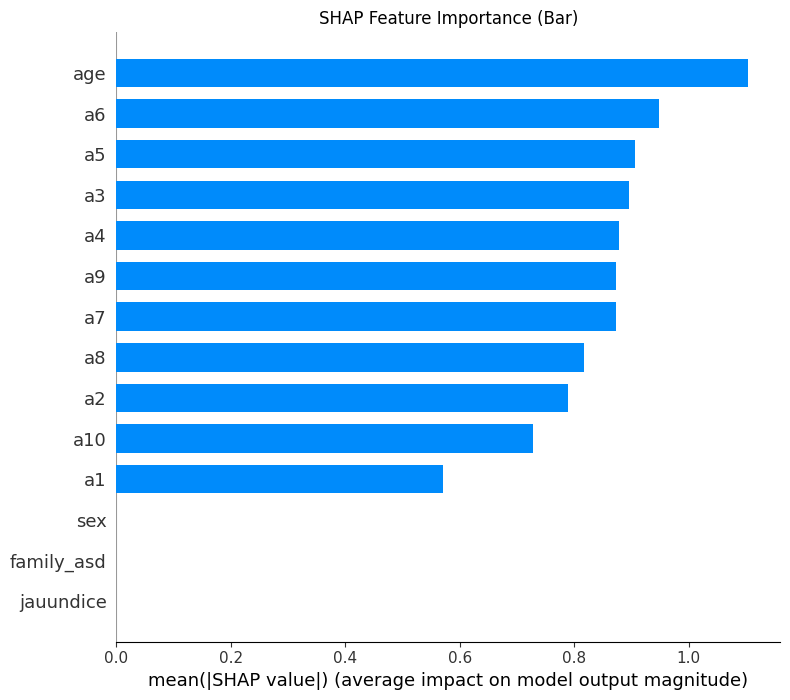

Generating SHAP summary plot (dot)...
An error occurred during SHAP analysis: summary_legacy() got an unexpected keyword argument 'showswing'

--- Script Finished ---


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
import xgboost as xgb
import shap
import matplotlib.pyplot as plt
from IPython.display import display

# --- 1. Load Data ---
try:
    df = pd.read_csv('Autism_Screening_Data_Combined.csv', na_values=['?'])
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print("Error: 'Autism_Screening_Data_Combined.csv' not found. Make sure the file is in the correct directory.")
    exit()

# --- 2. Initial Data Inspection and Basic Cleaning ---
print("\nOriginal dataset shape:", df.shape)

# Normalize all column names
original_columns = df.columns.tolist()
df.columns = [col.strip().lower().replace('/', '_').replace(' ', '_') for col in df.columns]
normalized_columns = df.columns.tolist()
print("\nOriginal columns:", original_columns)
print("Normalized columns:", normalized_columns)

# Drop the Case_No column (if it exists)
if 'case_no' in df.columns:
    df = df.drop('case_no', axis=1)
    print("\nDropped 'case_no' column.")

print("\nFirst 5 rows of the dataset (with normalized columns):")
display(df.head())
print("\nInfo about dataset columns and data types (with normalized columns):")
df.info()

# --- 3. Define Target and Features ---
TARGET_COLUMN_CANDIDATES = ['class_asd', 'class']
TARGET_COLUMN = None
for tc in TARGET_COLUMN_CANDIDATES:
    if tc in df.columns:
        TARGET_COLUMN = tc
        print(f"\nTarget column identified as: '{TARGET_COLUMN}'")
        break

if TARGET_COLUMN is None:
    print(f"\nError: None of the candidate target columns {TARGET_COLUMN_CANDIDATES} found in the DataFrame.")
    print(f"Available columns: {df.columns.tolist()}")
    exit()

# Convert target variable to numerical (0 and 1)
if df[TARGET_COLUMN].dtype == 'object':
    df[TARGET_COLUMN] = df[TARGET_COLUMN].astype(str).str.upper().map({'YES': 1, 'NO': 0})
    print(f"\nTarget column '{TARGET_COLUMN}' converted to 0/1.")

if df[TARGET_COLUMN].isnull().any():
    print(f"Warning: Found NaNs in target column '{TARGET_COLUMN}' after mapping. Dropping these rows.")
    df.dropna(subset=[TARGET_COLUMN], inplace=True)
    try:
        df[TARGET_COLUMN] = df[TARGET_COLUMN].astype(int)
    except ValueError:
        print(f"Error: Could not convert target column '{TARGET_COLUMN}' to integer after dropping NaNs. Check data values.")
        exit()

X = df.drop(TARGET_COLUMN, axis=1)
y = df[TARGET_COLUMN]

print(f"\nShape of features (X): {X.shape}")
print(f"Shape of target (y): {y.shape}")
print(f"\nValue counts for target variable '{TARGET_COLUMN}':")
print(y.value_counts(dropna=False))
print("\nColumns in X (features):")
print(X.columns.tolist())

# --- 4. Identify Feature Types (using normalized names) ---
# A_Score columns (correctly named as in dataset: a1, a2, etc.)
a_score_features = [f'a{i}' for i in range(1, 11) if f'a{i}' in X.columns]

# Other numerical features (corrected to match dataset)
other_numerical_expected = ['age']
numerical_features = a_score_features + [col for col in other_numerical_expected if col in X.columns]

# Binary categorical features (corrected to match dataset)
binary_categorical_features_map = {
    'sex': {'f': 0, 'm': 1},
    'jauundice': {'no': 0, 'yes': 1},
    'family_asd': {'no': 0, 'yes': 1}
}

# One-hot categorical features (none in this dataset)
categorical_features_onehot = []

print("\nNumerical features identified:", numerical_features)
print("Categorical features for binary encoding:", list(binary_categorical_features_map.keys()))
print("Categorical features for one-hot encoding:", categorical_features_onehot)

# --- 5. Preprocessing ---
processed_binary_features = []
for col, mapping in binary_categorical_features_map.items():
    if col in X.columns:
        if X[col].dtype == 'object':
            X.loc[:, col] = X[col].astype(str).str.lower()
            X.loc[:, col] = X[col].map(mapping)
            if X[col].isnull().any():
                print(f"Warning: NaNs in binary column '{col}' after mapping. Filling with most frequent.")
                X.loc[:, col] = X[col].fillna(X[col].mode()[0])
        processed_binary_features.append(col)
    else:
        print(f"Warning: Binary categorical column '{col}' not found, skipping.")

# Convert binary features to numerical
for col in processed_binary_features:
    if col not in numerical_features:
        numerical_features.append(col)

# Ensure numerical features are numeric
final_numerical_features = []
for col in numerical_features:
    if col in X.columns:
        X.loc[:, col] = pd.to_numeric(X[col], errors='coerce')
        if X[col].isnull().any():
            print(f"Warning: NaNs in numerical column '{col}' after coercion. Will be handled by imputer.")
        final_numerical_features.append(col)
    else:
        print(f"Warning: Numerical column '{col}' expected but not found.")
numerical_features = final_numerical_features

valid_categorical_features_onehot = [col for col in categorical_features_onehot if col in X.columns]
valid_numerical_features = [col for col in numerical_features if col in X.columns]

print("\nValid numerical features for preprocessing:", valid_numerical_features)
print("Valid categorical features for one-hot encoding:", valid_categorical_features_onehot)

# --- Check for Valid Features ---
if not valid_numerical_features and not valid_categorical_features_onehot:
    print("\nError: No valid numerical or categorical features identified for preprocessing.")
    print("Columns available in X:", X.columns.tolist())
    exit()

# --- Preprocessor Setup ---
transformers_list = []
if valid_numerical_features:
    numerical_pipeline = Pipeline([('imputer', SimpleImputer(strategy='median'))])
    transformers_list.append(('num', numerical_pipeline, valid_numerical_features))
if valid_categorical_features_onehot:
    categorical_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
    ])
    transformers_list.append(('cat', categorical_pipeline, valid_categorical_features_onehot))

if not transformers_list:
    print("\nError: No valid transformers created. Exiting.")
    exit()

preprocessor = ColumnTransformer(transformers=transformers_list, remainder='drop')

# --- Train-Test Split ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)
print(f"\nTraining data shape: X_train={X_train.shape}, y_train={y_train.shape}")
print(f"Testing data shape: X_test={X_test.shape}, y_test={y_test.shape}")

# --- Apply Preprocessing ---
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

print("\nShape of processed training data:", X_train_processed.shape)
print("Shape of processed testing data:", X_test_processed.shape)

# --- Create DataFrames with Feature Names ---
feature_names_out = []
num_transformer_tuple = next(((name, t, cols) for name, t, cols in preprocessor.transformers_ if name == 'num'), None)
if num_transformer_tuple and valid_numerical_features:
    feature_names_out.extend(num_transformer_tuple[2])

cat_transformer_tuple = next(((name, t, cols) for name, t, cols in preprocessor.transformers_ if name == 'cat'), None)
if cat_transformer_tuple and valid_categorical_features_onehot:
    cat_pipeline = cat_transformer_tuple[1]
    onehot_encoder = cat_pipeline.named_steps['onehot']
    onehot_feature_names = onehot_encoder.get_feature_names_out(cat_transformer_tuple[2])
    feature_names_out.extend(onehot_feature_names)

if len(feature_names_out) == X_train_processed.shape[1]:
    X_train_processed_df = pd.DataFrame(X_train_processed, columns=feature_names_out)
    X_test_processed_df = pd.DataFrame(X_test_processed, columns=feature_names_out)
    print("\nProcessed data converted to DataFrame with feature names.")
    print("\nProcessed training data (first 5 rows):")
    display(X_train_processed_df.head())
else:
    print(f"Warning: Mismatch in feature names ({len(feature_names_out)}) and columns ({X_train_processed.shape[1]}). Using numpy arrays.")
    X_train_processed_df = X_train_processed
    X_test_processed_df = X_test_processed

# --- Check Processed Data ---
if (isinstance(X_train_processed_df, np.ndarray) and X_train_processed_df.size == 0) or \
   (isinstance(X_train_processed_df, pd.DataFrame) and X_train_processed_df.empty):
    print("\nError: Processed training data is empty. Cannot train model. Exiting.")
    exit()
if X_train_processed_df.shape[0] == 0:
    print("\nError: Processed training data has 0 samples. Cannot train model. Exiting.")
    exit()
if (isinstance(X_train_processed_df, np.ndarray) and X_train_processed_df.shape[1] == 0) or \
   (isinstance(X_train_processed_df, pd.DataFrame) and X_train_processed_df.shape[1] == 0):
    print("\nError: Processed training data has 0 columns. Cannot train model. Exiting.")
    exit()

# --- Debug Info ---
print("\nDebugging information before model training:")
print(f"Shape of X_train_processed_df: {X_train_processed_df.shape}")
print(f"Type of X_train_processed_df: {type(X_train_processed_df)}")
print(f"Columns in X_train_processed_df (if DataFrame): {X_train_processed_df.columns.tolist() if isinstance(X_train_processed_df, pd.DataFrame) else 'Not a DataFrame'}")
print(f"Valid numerical features used: {valid_numerical_features}")
print(f"Valid categorical features for one-hot encoding used: {valid_categorical_features_onehot}")
print(f"Length of transformers_list: {len(transformers_list)}")
print("\nPreprocessor transformers:")
for name, trans, cols in preprocessor.transformers_:
    print(f"  - Name: {name}, Transformer: {type(trans)}, Columns: {cols}")

# --- Train Model ---
print("\nTraining XGBoost model...")
model = xgb.XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    random_state=42,
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3
)

model.fit(X_train_processed_df, y_train)
print("XGBoost model trained.")

# --- Evaluate Model ---
y_pred_train = model.predict(X_train_processed_df)
y_pred_test = model.predict(X_test_processed_df)
y_pred_proba_test = model.predict_proba(X_test_processed_df)[:, 1]

print("\n--- Model Evaluation ---")
print("Training Accuracy:", accuracy_score(y_train, y_pred_train))
print("Test Accuracy:", accuracy_score(y_test, y_pred_test))
print("\nTest ROC AUC Score:", roc_auc_score(y_test, y_pred_proba_test))
print("\nClassification Report (Test Set):")
print(classification_report(y_test, y_pred_test))

# --- SHAP Explanations ---
if isinstance(X_test_processed_df, pd.DataFrame) and not X_test_processed_df.empty:
    try:
        background_data = X_train_processed_df
        if isinstance(X_train_processed_df, np.ndarray) and X_train_processed_df.shape[0] > 100:
            sample_indices = np.random.choice(X_train_processed_df.shape[0], 100, replace=False)
            background_data = X_train_processed_df[sample_indices, :]

        explainer = shap.TreeExplainer(model, background_data)
        shap_values = explainer.shap_values(X_test_processed_df)

        shap_values_for_plot = shap_values
        if isinstance(shap_values, list) and len(shap_values) == 2:
            shap_values_for_plot = shap_values[1]

        print("Generating SHAP summary plot (bar)...")
        shap.summary_plot(shap_values_for_plot, X_test_processed_df, plot_type="bar", show=False)
        plt.title("SHAP Feature Importance (Bar)")
        plt.tight_layout()
        plt.show()

        print("Generating SHAP summary plot (dot)...")
        shap.summary_plot(shap_values_for_plot, X_test_processed_df, showswing=False)
        plt.title("SHAP Feature Importance (Dot Plot)")
        plt.tight_layout()
        plt.show()

        if len(X_test_processed_df) > 0:
            print("\nGenerating SHAP waterfall plot for the first test instance...")
            expected_value_for_plot = explainer.expected_value
            if isinstance(expected_value_for_plot, list) and len(expected_value_for_plot) == 2:
                expected_value_for_plot = expected_value_for_plot[1]

            shap.waterfall_plot(shap.Explanation(
                values=shap_values_for_plot[0, :],
                base_values=expected_value_for_plot,
                data=X_test_processed_df.iloc[0, :],
                feature_names=X_test_processed_df.columns.tolist()
            ), show=False)
            plt.title("SHAP Waterfall Plot for First Test Instance")
            plt.tight_layout()
            plt.show()
        print("\nSHAP analysis complete.")

    except Exception as e:
        print(f"An error occurred during SHAP analysis: {e}")
else:
    print("Skipping SHAP plots as processed test data is not a suitable DataFrame or is empty.")

print("\n--- Script Finished ---")

Dataset loaded successfully.

Original dataset shape: (6075, 15)

Original columns: ['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'Age', 'Sex', 'Jauundice', 'Family_ASD', 'Class']
Normalized columns: ['a1', 'a2', 'a3', 'a4', 'a5', 'a6', 'a7', 'a8', 'a9', 'a10', 'age', 'sex', 'jauundice', 'family_asd', 'class']

First 5 rows of the dataset:


,a1,a2,a3,a4,a5,a6,a7,a8,a9,a10,age,sex,jauundice,family_asd,class
0,1,1,0,1,0,0,1,1,0,0,15,m,no,no,NO
1,0,1,1,1,0,1,1,0,1,0,15,m,no,no,NO
2,1,1,1,0,1,1,1,1,1,1,15,f,no,yes,YES
3,1,1,1,1,1,1,1,1,0,0,16,f,no,no,YES
4,1,1,1,1,1,1,1,1,1,1,15,f,no,no,YES



Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6075 entries, 0 to 6074
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   a1          6075 non-null   int64 
 1   a2          6075 non-null   int64 
 2   a3          6075 non-null   int64 
 3   a4          6075 non-null   int64 
 4   a5          6075 non-null   int64 
 5   a6          6075 non-null   int64 
 6   a7          6075 non-null   int64 
 7   a8          6075 non-null   int64 
 8   a9          6075 non-null   int64 
 9   a10         6075 non-null   int64 
 10  age         6075 non-null   int64 
 11  sex         6075 non-null   object
 12  jauundice   6075 non-null   object
 13  family_asd  6075 non-null   object
 14  class       6075 non-null   object
dtypes: int64(11), object(4)
memory usage: 712.0+ KB

Target column identified as: 'class'

Target column 'class' converted to 0/1.

Shape of features (X): (6075, 14)
Shape of target (y): (6075,)

V

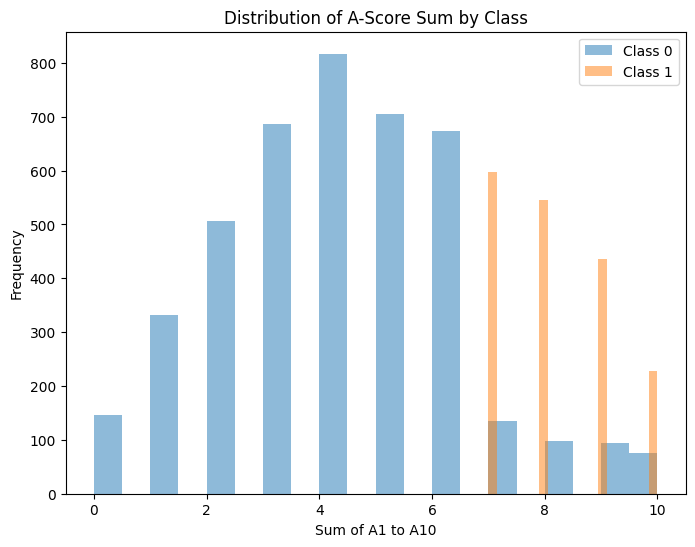


Numerical features identified: ['a1', 'a2', 'a3', 'a4', 'a5', 'a6', 'a7', 'a8', 'a9', 'a10', 'age']
Categorical features for binary encoding: ['sex', 'jauundice', 'family_asd']
Categorical features for one-hot encoding: []

Valid numerical features for preprocessing: ['a1', 'a2', 'a3', 'a4', 'a5', 'a6', 'a7', 'a8', 'a9', 'a10', 'age', 'sex', 'jauundice', 'family_asd']
Valid categorical features for one-hot encoding: []

Training data shape: X_train=(4556, 15), y_train=(4556,)
Testing data shape: X_test=(1519, 15), y_test=(1519,)

Number of duplicate rows between train and test: 1403

Shape of processed training data: (4556, 14)
Shape of processed testing data: (1519, 14)

Processed data converted to DataFrame with feature names.

Processed training data (first 5 rows):


,a1,a2,a3,a4,a5,a6,a7,a8,a9,a10,age,sex,jauundice,family_asd
0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,4.0,1.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,27.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,2.0,1.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,3.0,0.0,0.0,0.0
4,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,19.0,1.0,0.0,0.0



Debugging information before model training:
Shape of X_train_processed_df: (4556, 14)
Type of X_train_processed_df: <class 'pandas.core.frame.DataFrame'>
Columns in X_train_processed_df (if DataFrame): ['a1', 'a2', 'a3', 'a4', 'a5', 'a6', 'a7', 'a8', 'a9', 'a10', 'age', 'sex', 'jauundice', 'family_asd']
Valid numerical features used: ['a1', 'a2', 'a3', 'a4', 'a5', 'a6', 'a7', 'a8', 'a9', 'a10', 'age', 'sex', 'jauundice', 'family_asd']
Valid categorical features for one-hot encoding used: []
Length of transformers_list: 1

Preprocessor transformers:
  - Name: num, Transformer: <class 'sklearn.pipeline.Pipeline'>, Columns: ['a1', 'a2', 'a3', 'a4', 'a5', 'a6', 'a7', 'a8', 'a9', 'a10', 'age', 'sex', 'jauundice', 'family_asd']
  - Name: remainder, Transformer: <class 'str'>, Columns: [14]

Training XGBoost model...
XGBoost model trained.

Performing 5-fold cross-validation...
Cross-validation accuracy scores: [0.94188596 0.92425906 0.93413831 0.91657519 0.94840834]
Mean CV accuracy: 0.933

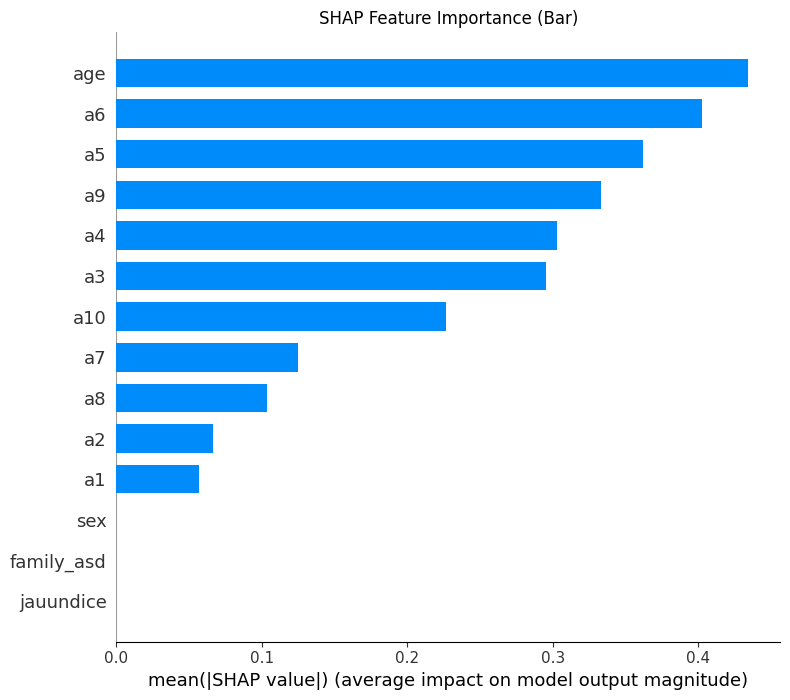

Generating SHAP summary plot (dot)...


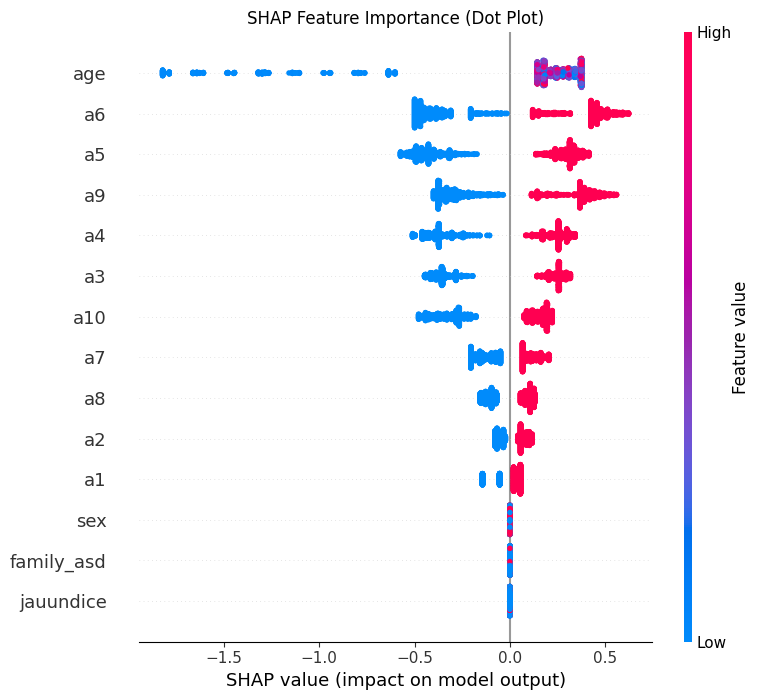


Generating SHAP waterfall plot for the first test instance...


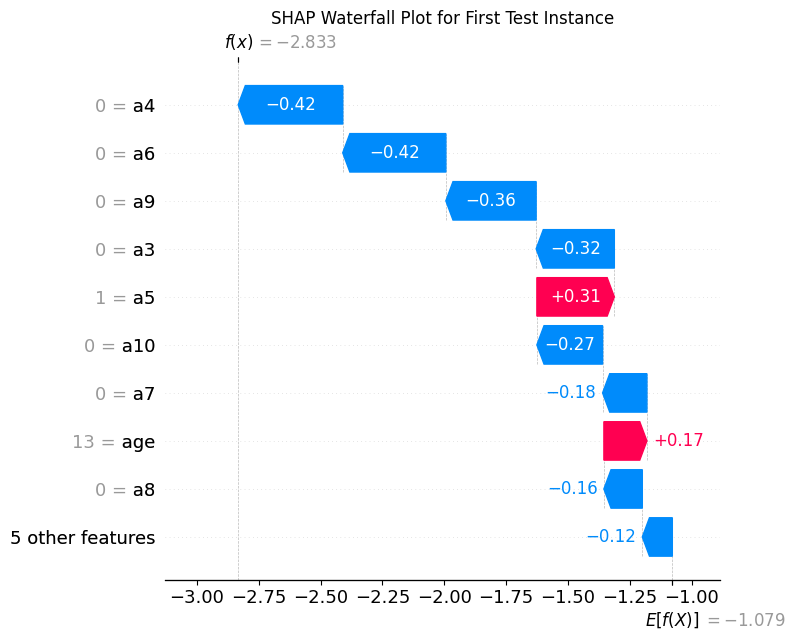


SHAP analysis complete.

--- Training Model with Reduced Features (Excluding a1 to a10) ---

--- Reduced Model Evaluation ---
Test Accuracy (Reduced Features): 0.7024358130348913

Test ROC AUC Score (Reduced Features): 0.7220865824592873

Classification Report (Reduced Features):
              precision    recall  f1-score   support

           0       0.72      0.95      0.82      1068
           1       0.49      0.11      0.18       451

    accuracy                           0.70      1519
   macro avg       0.61      0.53      0.50      1519
weighted avg       0.65      0.70      0.63      1519


--- Script Finished ---


In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
import xgboost as xgb
import shap
import matplotlib.pyplot as plt
from IPython.display import display

# --- 1. Load Data ---
try:
    df = pd.read_csv('Autism_Screening_Data_Combined.csv', na_values=['?'])
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print("Error: 'Autism_Screening_Data_Combined.csv' not found. Make sure the file is in the correct directory.")
    exit()

# --- 2. Initial Data Inspection and Basic Cleaning ---
print("\nOriginal dataset shape:", df.shape)

# Normalize column names
original_columns = df.columns.tolist()
df.columns = [col.strip().lower().replace('/', '_').replace(' ', '_') for col in df.columns]
normalized_columns = df.columns.tolist()
print("\nOriginal columns:", original_columns)
print("Normalized columns:", normalized_columns)

# Drop case_no if present
if 'case_no' in df.columns:
    df = df.drop('case_no', axis=1)
    print("\nDropped 'case_no' column.")

print("\nFirst 5 rows of the dataset:")
display(df.head())
print("\nDataset info:")
df.info()

# --- 3. Define Target and Features ---
TARGET_COLUMN_CANDIDATES = ['class_asd', 'class']
TARGET_COLUMN = None
for tc in TARGET_COLUMN_CANDIDATES:
    if tc in df.columns:
        TARGET_COLUMN = tc
        print(f"\nTarget column identified as: '{TARGET_COLUMN}'")
        break

if TARGET_COLUMN is None:
    print(f"\nError: None of the candidate target columns {TARGET_COLUMN_CANDIDATES} found.")
    print(f"Available columns: {df.columns.tolist()}")
    exit()

# Convert target to numerical (0 for NO, 1 for YES)
if df[TARGET_COLUMN].dtype == 'object':
    df[TARGET_COLUMN] = df[TARGET_COLUMN].astype(str).str.upper().map({'YES': 1, 'NO': 0})
    print(f"\nTarget column '{TARGET_COLUMN}' converted to 0/1.")

if df[TARGET_COLUMN].isnull().any():
    print(f"Warning: NaNs in target column '{TARGET_COLUMN}'. Dropping these rows.")
    df.dropna(subset=[TARGET_COLUMN], inplace=True)
    try:
        df[TARGET_COLUMN] = df[TARGET_COLUMN].astype(int)
    except ValueError:
        print(f"Error: Could not convert target column '{TARGET_COLUMN}' to integer. Check data values.")
        exit()

X = df.drop(TARGET_COLUMN, axis=1)
y = df[TARGET_COLUMN]

print(f"\nShape of features (X): {X.shape}")
print(f"Shape of target (y): {y.shape}")
print(f"\nValue counts for target variable '{TARGET_COLUMN}':")
print(y.value_counts(dropna=False))
print("\nColumns in X (features):")
print(X.columns.tolist())

# --- 4. Diagnostic: Check for Data Leakage ---
# Compute correlations
print("\nCorrelation of features with target:")
correlations = X.corrwith(y, numeric_only=True)
print(correlations)

# Check if sum of a1 to a10 predicts class
if all(f'a{i}' in X.columns for i in range(1, 11)):
    X['a_score_sum'] = X[[f'a{i}' for i in range(1, 11)]].sum(axis=1)
    print("\nCorrelation of a_score_sum with target:")
    print(X['a_score_sum'].corr(y))

    # Plot distribution of a_score_sum by class
    plt.figure(figsize=(8, 6))
    for label in [0, 1]:
        plt.hist(X[y == label]['a_score_sum'], bins=20, alpha=0.5, label=f'Class {label}')
    plt.title('Distribution of A-Score Sum by Class')
    plt.xlabel('Sum of A1 to A10')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

# --- 5. Identify Feature Types ---
a_score_features = [f'a{i}' for i in range(1, 11) if f'a{i}' in X.columns]
other_numerical_expected = ['age']
numerical_features = a_score_features + [col for col in other_numerical_expected if col in X.columns]

binary_categorical_features_map = {
    'sex': {'f': 0, 'm': 1},
    'jauundice': {'no': 0, 'yes': 1},
    'family_asd': {'no': 0, 'yes': 1}
}
categorical_features_onehot = []  # No one-hot encoded features in this dataset

print("\nNumerical features identified:", numerical_features)
print("Categorical features for binary encoding:", list(binary_categorical_features_map.keys()))
print("Categorical features for one-hot encoding:", categorical_features_onehot)

# --- 6. Preprocessing ---
processed_binary_features = []
for col, mapping in binary_categorical_features_map.items():
    if col in X.columns:
        if X[col].dtype == 'object':
            X.loc[:, col] = X[col].astype(str).str.lower()
            X.loc[:, col] = X[col].map(mapping)
            if X[col].isnull().any():
                print(f"Warning: NaNs in binary column '{col}' after mapping. Filling with most frequent.")
                X.loc[:, col] = X[col].fillna(X[col].mode()[0])
        processed_binary_features.append(col)
    else:
        print(f"Warning: Binary categorical column '{col}' not found, skipping.")

# Add binary features to numerical features
for col in processed_binary_features:
    if col not in numerical_features:
        numerical_features.append(col)

# Ensure numerical features are numeric
final_numerical_features = []
for col in numerical_features:
    if col in X.columns:
        X.loc[:, col] = pd.to_numeric(X[col], errors='coerce')
        if X[col].isnull().any():
            print(f"Warning: NaNs in numerical column '{col}'. Will be handled by imputer.")
        final_numerical_features.append(col)
    else:
        print(f"Warning: Numerical column '{col}' not found.")
numerical_features = final_numerical_features

valid_categorical_features_onehot = [col for col in categorical_features_onehot if col in X.columns]
valid_numerical_features = [col for col in numerical_features if col in X.columns]

print("\nValid numerical features for preprocessing:", valid_numerical_features)
print("Valid categorical features for one-hot encoding:", valid_categorical_features_onehot)

# --- 7. Check for Valid Features ---
if not valid_numerical_features and not valid_categorical_features_onehot:
    print("\nError: No valid numerical or categorical features identified.")
    print("Columns available in X:", X.columns.tolist())
    exit()

# --- 8. Preprocessor Setup ---
transformers_list = []
if valid_numerical_features:
    numerical_pipeline = Pipeline([('imputer', SimpleImputer(strategy='median'))])
    transformers_list.append(('num', numerical_pipeline, valid_numerical_features))
if valid_categorical_features_onehot:
    categorical_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
    ])
    transformers_list.append(('cat', categorical_pipeline, valid_categorical_features_onehot))

if not transformers_list:
    print("\nError: No valid transformers created. Exiting.")
    exit()

preprocessor = ColumnTransformer(transformers=transformers_list, remainder='drop')

# --- 9. Train-Test Split ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)
print(f"\nTraining data shape: X_train={X_train.shape}, y_train={y_train.shape}")
print(f"Testing data shape: X_test={X_test.shape}, y_test={y_test.shape}")

# Check for duplicates between train and test
train_test_concat = pd.concat([X_train, X_test])
duplicates = train_test_concat.duplicated(keep=False).sum()
print(f"\nNumber of duplicate rows between train and test: {duplicates}")

# --- 10. Apply Preprocessing ---
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

print("\nShape of processed training data:", X_train_processed.shape)
print("Shape of processed testing data:", X_test_processed.shape)

# --- 11. Create DataFrames with Feature Names ---
feature_names_out = []
num_transformer_tuple = next(((name, t, cols) for name, t, cols in preprocessor.transformers_ if name == 'num'), None)
if num_transformer_tuple and valid_numerical_features:
    feature_names_out.extend(num_transformer_tuple[2])

cat_transformer_tuple = next(((name, t, cols) for name, t, cols in preprocessor.transformers_ if name == 'cat'), None)
if cat_transformer_tuple and valid_categorical_features_onehot:
    cat_pipeline = cat_transformer_tuple[1]
    onehot_encoder = cat_pipeline.named_steps['onehot']
    onehot_feature_names = onehot_encoder.get_feature_names_out(cat_transformer_tuple[2])
    feature_names_out.extend(onehot_feature_names)

if len(feature_names_out) == X_train_processed.shape[1]:
    X_train_processed_df = pd.DataFrame(X_train_processed, columns=feature_names_out)
    X_test_processed_df = pd.DataFrame(X_test_processed, columns=feature_names_out)
    print("\nProcessed data converted to DataFrame with feature names.")
    print("\nProcessed training data (first 5 rows):")
    display(X_train_processed_df.head())
else:
    print(f"Warning: Mismatch in feature names ({len(feature_names_out)}) and columns ({X_train_processed.shape[1]}). Using numpy arrays.")
    X_train_processed_df = X_train_processed
    X_test_processed_df = X_test_processed

# --- 12. Check Processed Data ---
if (isinstance(X_train_processed_df, np.ndarray) and X_train_processed_df.size == 0) or \
   (isinstance(X_train_processed_df, pd.DataFrame) and X_train_processed_df.empty):
    print("\nError: Processed training data is empty. Cannot train model. Exiting.")
    exit()
if X_train_processed_df.shape[0] == 0:
    print("\nError: Processed training data has 0 samples. Cannot train model. Exiting.")
    exit()
if (isinstance(X_train_processed_df, np.ndarray) and X_train_processed_df.shape[1] == 0) or \
   (isinstance(X_train_processed_df, pd.DataFrame) and X_train_processed_df.shape[1] == 0):
    print("\nError: Processed training data has 0 columns. Cannot train model. Exiting.")
    exit()

# --- 13. Debug Info ---
print("\nDebugging information before model training:")
print(f"Shape of X_train_processed_df: {X_train_processed_df.shape}")
print(f"Type of X_train_processed_df: {type(X_train_processed_df)}")
print(f"Columns in X_train_processed_df (if DataFrame): {X_train_processed_df.columns.tolist() if isinstance(X_train_processed_df, pd.DataFrame) else 'Not a DataFrame'}")
print(f"Valid numerical features used: {valid_numerical_features}")
print(f"Valid categorical features for one-hot encoding used: {valid_categorical_features_onehot}")
print(f"Length of transformers_list: {len(transformers_list)}")
print("\nPreprocessor transformers:")
for name, trans, cols in preprocessor.transformers_:
    print(f"  - Name: {name}, Transformer: {type(trans)}, Columns: {cols}")

# --- 14. Train Model ---
print("\nTraining XGBoost model...")
model = xgb.XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    random_state=42,
    n_estimators=50,  # Reduced to prevent overfitting
    learning_rate=0.05,  # Reduced for smoother learning
    max_depth=2  # Reduced for simpler model
)

model.fit(X_train_processed_df, y_train)
print("XGBoost model trained.")

# --- 15. Cross-Validation ---
print("\nPerforming 5-fold cross-validation...")
cv_scores = cross_val_score(model, X_train_processed_df, y_train, cv=5, scoring='accuracy')
print("Cross-validation accuracy scores:", cv_scores)
print("Mean CV accuracy:", cv_scores.mean())
print("Standard deviation:", cv_scores.std())

# --- 16. Evaluate Model ---
y_pred_train = model.predict(X_train_processed_df)
y_pred_test = model.predict(X_test_processed_df)
y_pred_proba_test = model.predict_proba(X_test_processed_df)[:, 1]

print("\n--- Model Evaluation ---")
print("Training Accuracy:", accuracy_score(y_train, y_pred_train))
print("Test Accuracy:", accuracy_score(y_test, y_pred_test))
print("\nTest ROC AUC Score:", roc_auc_score(y_test, y_pred_proba_test))
print("\nClassification Report (Test Set):")
print(classification_report(y_test, y_pred_test))

# --- 17. SHAP Explanations ---
if isinstance(X_test_processed_df, pd.DataFrame) and not X_test_processed_df.empty:
    try:
        background_data = X_train_processed_df
        if isinstance(X_train_processed_df, np.ndarray) and X_train_processed_df.shape[0] > 100:
            sample_indices = np.random.choice(X_train_processed_df.shape[0], 100, replace=False)
            background_data = X_train_processed_df[sample_indices, :]

        explainer = shap.TreeExplainer(model, background_data)
        shap_values = explainer.shap_values(X_test_processed_df)

        shap_values_for_plot = shap_values
        if isinstance(shap_values, list) and len(shap_values) == 2:
            shap_values_for_plot = shap_values[1]

        print("Generating SHAP summary plot (bar)...")
        shap.summary_plot(shap_values_for_plot, X_test_processed_df, plot_type="bar", show=False)
        plt.title("SHAP Feature Importance (Bar)")
        plt.tight_layout()
        plt.show()

        print("Generating SHAP summary plot (dot)...")
        shap.summary_plot(shap_values_for_plot, X_test_processed_df, show=False)
        plt.title("SHAP Feature Importance (Dot Plot)")
        plt.tight_layout()
        plt.show()

        if len(X_test_processed_df) > 0:
            print("\nGenerating SHAP waterfall plot for the first test instance...")
            expected_value_for_plot = explainer.expected_value
            if isinstance(expected_value_for_plot, list) and len(expected_value_for_plot) == 2:
                expected_value_for_plot = expected_value_for_plot[1]

            shap.waterfall_plot(shap.Explanation(
                values=shap_values_for_plot[0, :],
                base_values=expected_value_for_plot,
                data=X_test_processed_df.iloc[0, :],
                feature_names=X_test_processed_df.columns.tolist()
            ), show=False)
            plt.title("SHAP Waterfall Plot for First Test Instance")
            plt.tight_layout()
            plt.show()
        print("\nSHAP analysis complete.")

    except Exception as e:
        print(f"An error occurred during SHAP analysis: {e}")
else:
    print("Skipping SHAP plots as processed test data is not a suitable DataFrame or is empty.")

# --- 18. Train Model with Reduced Features (to Mitigate Leakage) ---
print("\n--- Training Model with Reduced Features (Excluding a1 to a10) ---")
X_reduced = X[['age', 'sex', 'jauundice', 'family_asd']]
X_train_red, X_test_red, y_train_red, y_test_red = train_test_split(
    X_reduced, y, test_size=0.25, random_state=42, stratify=y
)

# Update preprocessor for reduced features
valid_numerical_features_red = ['age', 'sex', 'jauundice', 'family_asd']
transformers_list_red = [('num', Pipeline([('imputer', SimpleImputer(strategy='median'))]), valid_numerical_features_red)]
preprocessor_red = ColumnTransformer(transformers=transformers_list_red, remainder='drop')

X_train_red_processed = preprocessor_red.fit_transform(X_train_red)
X_test_red_processed = preprocessor_red.transform(X_test_red)

# Convert to DataFrame
feature_names_red = valid_numerical_features_red
X_train_red_processed_df = pd.DataFrame(X_train_red_processed, columns=feature_names_red)
X_test_red_processed_df = pd.DataFrame(X_test_red_processed, columns=feature_names_red)

# Train and evaluate reduced model
model_red = xgb.XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    random_state=42,
    n_estimators=50,
    learning_rate=0.05,
    max_depth=2
)
model_red.fit(X_train_red_processed_df, y_train_red)

y_pred_red_test = model_red.predict(X_test_red_processed_df)
y_pred_red_proba_test = model_red.predict_proba(X_test_red_processed_df)[:, 1]

print("\n--- Reduced Model Evaluation ---")
print("Test Accuracy (Reduced Features):", accuracy_score(y_test_red, y_pred_red_test))
print("\nTest ROC AUC Score (Reduced Features):", roc_auc_score(y_test_red, y_pred_red_proba_test))
print("\nClassification Report (Reduced Features):")
print(classification_report(y_test_red, y_pred_red_test))

# --- 19. Script Finished ---
print("\n--- Script Finished ---")

Dataset loaded successfully.

Original dataset shape: (6075, 15)

Original columns: ['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'Age', 'Sex', 'Jauundice', 'Family_ASD', 'Class']
Normalized columns: ['a1', 'a2', 'a3', 'a4', 'a5', 'a6', 'a7', 'a8', 'a9', 'a10', 'age', 'sex', 'jauundice', 'family_asd', 'class']

First 5 rows of the dataset:


,a1,a2,a3,a4,a5,a6,a7,a8,a9,a10,age,sex,jauundice,family_asd,class
0,1,1,0,1,0,0,1,1,0,0,15,m,no,no,NO
1,0,1,1,1,0,1,1,0,1,0,15,m,no,no,NO
2,1,1,1,0,1,1,1,1,1,1,15,f,no,yes,YES
3,1,1,1,1,1,1,1,1,0,0,16,f,no,no,YES
4,1,1,1,1,1,1,1,1,1,1,15,f,no,no,YES



Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6075 entries, 0 to 6074
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   a1          6075 non-null   int64 
 1   a2          6075 non-null   int64 
 2   a3          6075 non-null   int64 
 3   a4          6075 non-null   int64 
 4   a5          6075 non-null   int64 
 5   a6          6075 non-null   int64 
 6   a7          6075 non-null   int64 
 7   a8          6075 non-null   int64 
 8   a9          6075 non-null   int64 
 9   a10         6075 non-null   int64 
 10  age         6075 non-null   int64 
 11  sex         6075 non-null   object
 12  jauundice   6075 non-null   object
 13  family_asd  6075 non-null   object
 14  class       6075 non-null   object
dtypes: int64(11), object(4)
memory usage: 712.0+ KB

Target column identified as: 'class'

Target column 'class' converted to 0/1.

Shape of features (X): (6075, 14)
Shape of target (y): (6075,)

V

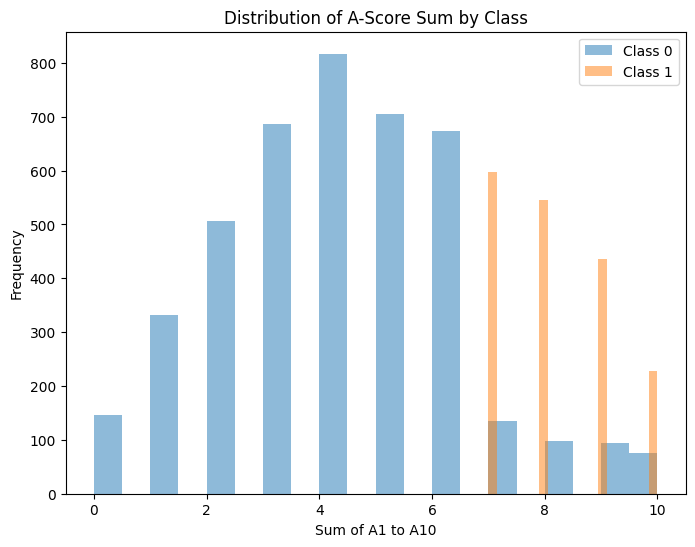


Numerical features identified: ['a1', 'a2', 'a3', 'a4', 'a5', 'a6', 'a7', 'a8', 'a9', 'a10', 'age']
Categorical features for binary encoding: ['sex', 'jauundice', 'family_asd']
Categorical features for one-hot encoding: []

Valid numerical features for preprocessing: ['a1', 'a2', 'a3', 'a4', 'a5', 'a6', 'a7', 'a8', 'a9', 'a10', 'age', 'sex', 'jauundice', 'family_asd']
Valid categorical features for one-hot encoding: []

Training data shape: X_train=(4556, 15), y_train=(4556,)
Testing data shape: X_test=(1519, 15), y_test=(1519,)

Number of duplicate rows between train and test: 1403

Shape of processed training data: (4556, 14)
Shape of processed testing data: (1519, 14)

Processed data converted to DataFrame with feature names.

Processed training data (first 5 rows):


,a1,a2,a3,a4,a5,a6,a7,a8,a9,a10,age,sex,jauundice,family_asd
0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,4.0,1.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,27.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,2.0,1.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,3.0,0.0,0.0,0.0
4,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,19.0,1.0,0.0,0.0



Debugging information before model training:
Shape of X_train_processed_df: (4556, 14)
Type of X_train_processed_df: <class 'pandas.core.frame.DataFrame'>
Columns in X_train_processed_df: ['a1', 'a2', 'a3', 'a4', 'a5', 'a6', 'a7', 'a8', 'a9', 'a10', 'age', 'sex', 'jauundice', 'family_asd']
Valid numerical features used: ['a1', 'a2', 'a3', 'a4', 'a5', 'a6', 'a7', 'a8', 'a9', 'a10', 'age', 'sex', 'jauundice', 'family_asd']
Valid categorical features for one-hot encoding used: []
Length of transformers_list: 1

Preprocessor transformers:
  - Name: num, Transformer: <class 'sklearn.pipeline.Pipeline'>, Columns: ['a1', 'a2', 'a3', 'a4', 'a5', 'a6', 'a7', 'a8', 'a9', 'a10', 'age', 'sex', 'jauundice', 'family_asd']
  - Name: remainder, Transformer: <class 'str'>, Columns: [14]

Training XGBoost model (Full Features)...
XGBoost model trained.

Performing 5-fold cross-validation (Full Model)...
Cross-validation accuracy scores: [0.91995614 0.91657519 0.89791438 0.90230516 0.90889133]
Mean CV a

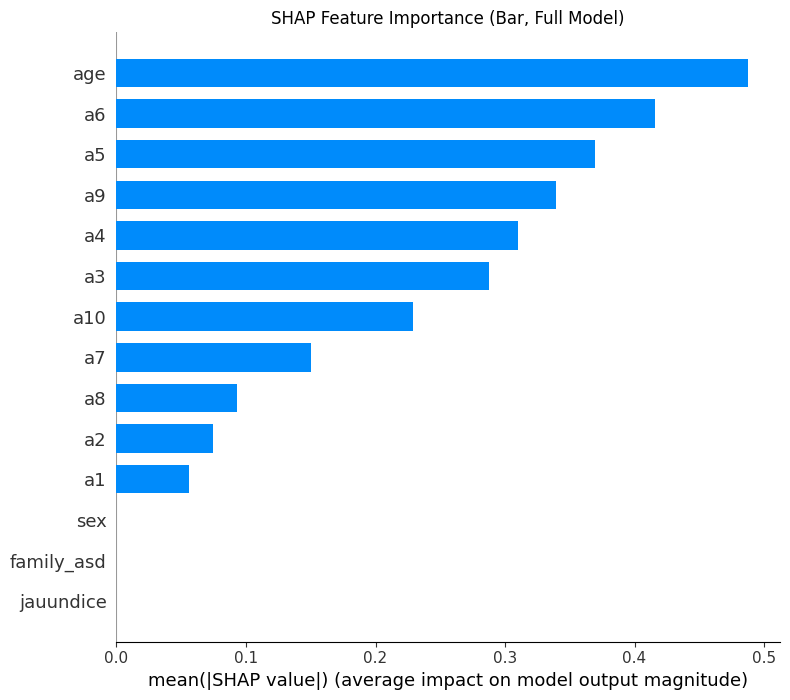

Generating SHAP summary plot (dot, Full Model)...


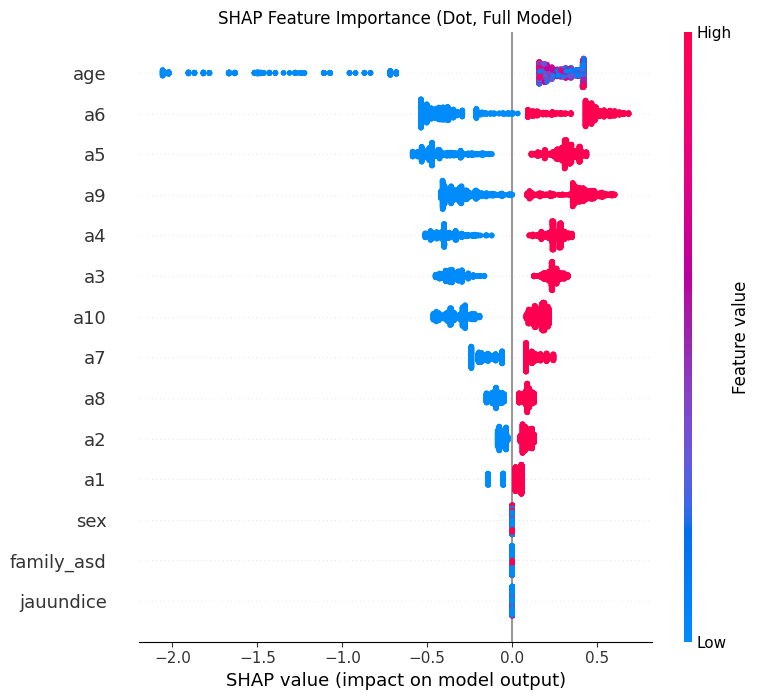


Generating SHAP waterfall plot for the first test instance (Full Model)...


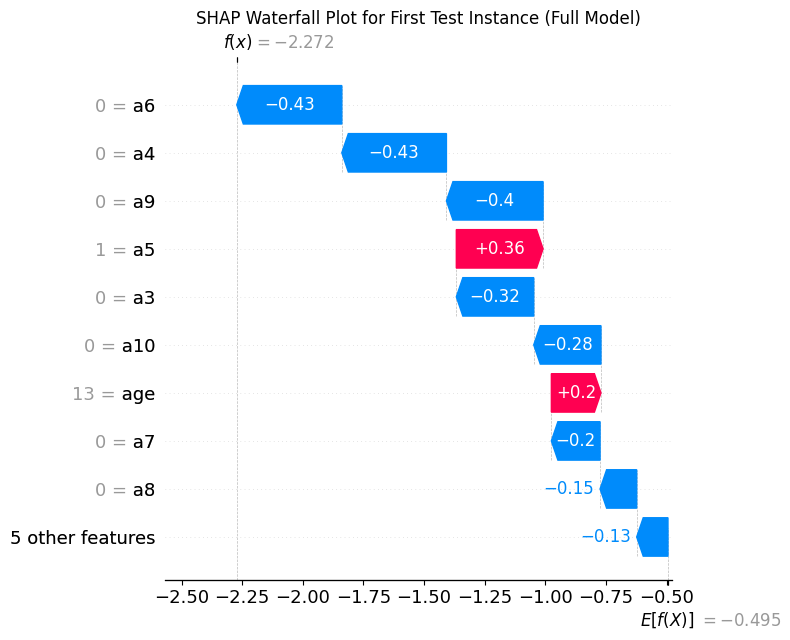


SHAP analysis complete (Full Model).

--- Training Model with Reduced Features (Excluding a1 to a10) ---

Best parameters for reduced model: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}

--- Reduced Model Evaluation ---
Test Accuracy (Reduced Features): 0.6695194206714944

Test ROC AUC Score (Reduced Features): 0.7396630043930674

Classification Report (Reduced Features):
              precision    recall  f1-score   support

           0       0.83      0.66      0.74      1068
           1       0.46      0.69      0.55       451

    accuracy                           0.67      1519
   macro avg       0.65      0.67      0.65      1519
weighted avg       0.72      0.67      0.68      1519

Generating SHAP summary plot (bar, Reduced Model)...


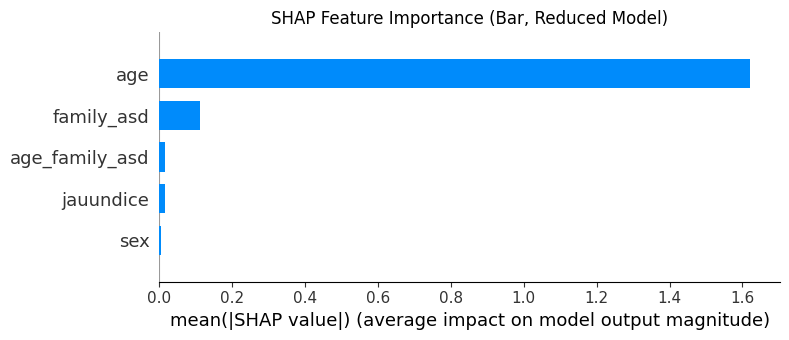

Generating SHAP summary plot (dot, Reduced Model)...


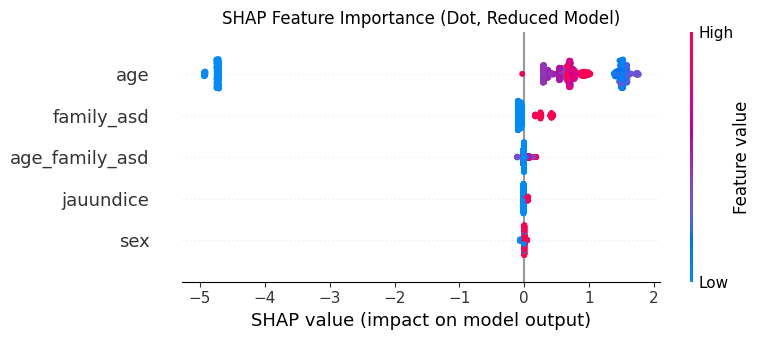


Generating SHAP waterfall plot for the first test instance (Reduced Model)...


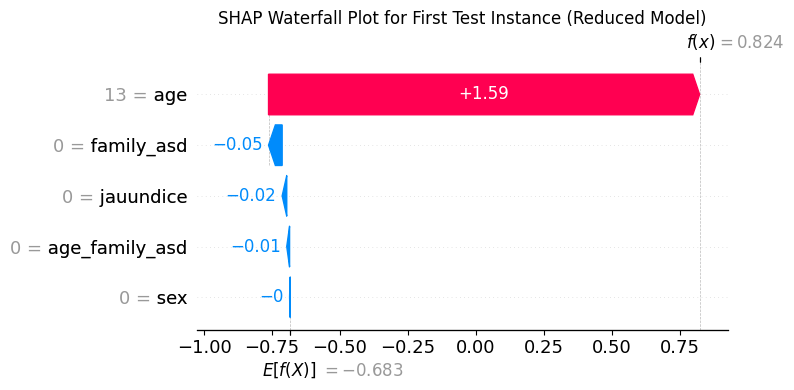


SHAP analysis complete (Reduced Model).

--- Training Logistic Regression Baseline (Reduced Features) ---

--- Logistic Regression Evaluation ---
Test Accuracy (Logistic Regression): 0.608953258722844

Test ROC AUC Score (Logistic Regression): 0.5704904623101389

Classification Report (Logistic Regression):
              precision    recall  f1-score   support

           0       0.73      0.71      0.72      1068
           1       0.35      0.38      0.37       451

    accuracy                           0.61      1519
   macro avg       0.54      0.54      0.54      1519
weighted avg       0.62      0.61      0.61      1519


--- Script Finished ---


In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
import shap
import matplotlib.pyplot as plt
from IPython.display import display
from imblearn.over_sampling import SMOTE  # For handling class imbalance

# --- 1. Load Data ---
try:
    df = pd.read_csv('Autism_Screening_Data_Combined.csv', na_values=['?'])
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print("Error: 'Autism_Screening_Data_Combined.csv' not found.")
    exit()

# --- 2. Initial Data Inspection and Cleaning ---
print("\nOriginal dataset shape:", df.shape)
original_columns = df.columns.tolist()
df.columns = [col.strip().lower().replace('/', '_').replace(' ', '_') for col in df.columns]
normalized_columns = df.columns.tolist()
print("\nOriginal columns:", original_columns)
print("Normalized columns:", normalized_columns)

if 'case_no' in df.columns:
    df = df.drop('case_no', axis=1)
    print("\nDropped 'case_no' column.")

print("\nFirst 5 rows of the dataset:")
display(df.head())
print("\nDataset info:")
df.info()

# --- 3. Define Target and Features ---
TARGET_COLUMN_CANDIDATES = ['class_asd', 'class']
TARGET_COLUMN = None
for tc in TARGET_COLUMN_CANDIDATES:
    if tc in df.columns:
        TARGET_COLUMN = tc
        print(f"\nTarget column identified as: '{TARGET_COLUMN}'")
        break

if TARGET_COLUMN is None:
    print(f"\nError: None of the candidate target columns {TARGET_COLUMN_CANDIDATES} found.")
    print(f"Available columns: {df.columns.tolist()}")
    exit()

if df[TARGET_COLUMN].dtype == 'object':
    df[TARGET_COLUMN] = df[TARGET_COLUMN].astype(str).str.upper().map({'YES': 1, 'NO': 0})
    print(f"\nTarget column '{TARGET_COLUMN}' converted to 0/1.")

if df[TARGET_COLUMN].isnull().any():
    print(f"Warning: NaNs in target column '{TARGET_COLUMN}'. Dropping these rows.")
    df.dropna(subset=[TARGET_COLUMN], inplace=True)
    try:
        df[TARGET_COLUMN] = df[TARGET_COLUMN].astype(int)
    except ValueError:
        print(f"Error: Could not convert target column '{TARGET_COLUMN}' to integer.")
        exit()

X = df.drop(TARGET_COLUMN, axis=1)
y = df[TARGET_COLUMN]

print(f"\nShape of features (X): {X.shape}")
print(f"Shape of target (y): {y.shape}")
print(f"\nValue counts for target variable '{TARGET_COLUMN}':")
print(y.value_counts(dropna=False))
print("\nColumns in X (features):")
print(X.columns.tolist())

# --- 4. Diagnostic: Check for Data Leakage ---
print("\nCorrelation of features with target:")
correlations = X.corrwith(y, numeric_only=True)
print(correlations)

if all(f'a{i}' in X.columns for i in range(1, 11)):
    X['a_score_sum'] = X[[f'a{i}' for i in range(1, 11)]].sum(axis=1)
    print("\nCorrelation of a_score_sum with target:")
    print(X['a_score_sum'].corr(y))

    plt.figure(figsize=(8, 6))
    for label in [0, 1]:
        plt.hist(X[y == label]['a_score_sum'], bins=20, alpha=0.5, label=f'Class {label}')
    plt.title('Distribution of A-Score Sum by Class')
    plt.xlabel('Sum of A1 to A10')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

# --- 5. Identify Feature Types ---
a_score_features = [f'a{i}' for i in range(1, 11) if f'a{i}' in X.columns]
other_numerical_expected = ['age']
numerical_features = a_score_features + [col for col in other_numerical_expected if col in X.columns]
binary_categorical_features_map = {
    'sex': {'f': 0, 'm': 1},
    'jauundice': {'no': 0, 'yes': 1},
    'family_asd': {'no': 0, 'yes': 1}
}
categorical_features_onehot = []

print("\nNumerical features identified:", numerical_features)
print("Categorical features for binary encoding:", list(binary_categorical_features_map.keys()))
print("Categorical features for one-hot encoding:", categorical_features_onehot)

# --- 6. Preprocessing ---
processed_binary_features = []
for col, mapping in binary_categorical_features_map.items():
    if col in X.columns:
        if X[col].dtype == 'object':
            X.loc[:, col] = X[col].astype(str).str.lower()
            X.loc[:, col] = X[col].map(mapping)
            if X[col].isnull().any():
                print(f"Warning: NaNs in binary column '{col}'. Filling with most frequent.")
                X.loc[:, col] = X[col].fillna(X[col].mode()[0])
        processed_binary_features.append(col)
    else:
        print(f"Warning: Binary categorical column '{col}' not found.")

for col in processed_binary_features:
    if col not in numerical_features:
        numerical_features.append(col)

final_numerical_features = []
for col in numerical_features:
    if col in X.columns:
        X.loc[:, col] = pd.to_numeric(X[col], errors='coerce')
        if X[col].isnull().any():
            print(f"Warning: NaNs in numerical column '{col}'. Will be handled by imputer.")
        final_numerical_features.append(col)
    else:
        print(f"Warning: Numerical column '{col}' not found.")
numerical_features = final_numerical_features

valid_categorical_features_onehot = [col for col in categorical_features_onehot if col in X.columns]
valid_numerical_features = [col for col in numerical_features if col in X.columns]

print("\nValid numerical features for preprocessing:", valid_numerical_features)
print("Valid categorical features for one-hot encoding:", valid_categorical_features_onehot)

# --- 7. Check for Valid Features ---
if not valid_numerical_features and not valid_categorical_features_onehot:
    print("\nError: No valid numerical or categorical features identified.")
    print("Columns available in X:", X.columns.tolist())
    exit()

# --- 8. Preprocessor Setup ---
transformers_list = []
if valid_numerical_features:
    numerical_pipeline = Pipeline([('imputer', SimpleImputer(strategy='median'))])
    transformers_list.append(('num', numerical_pipeline, valid_numerical_features))
if valid_categorical_features_onehot:
    categorical_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
    ])
    transformers_list.append(('cat', categorical_pipeline, valid_categorical_features_onehot))

if not transformers_list:
    print("\nError: No valid transformers created. Exiting.")
    exit()

preprocessor = ColumnTransformer(transformers=transformers_list, remainder='drop')

# --- 9. Train-Test Split ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)
print(f"\nTraining data shape: X_train={X_train.shape}, y_train={y_train.shape}")
print(f"Testing data shape: X_test={X_test.shape}, y_test={y_test.shape}")

train_test_concat = pd.concat([X_train, X_test])
duplicates = train_test_concat.duplicated(keep=False).sum()
print(f"\nNumber of duplicate rows between train and test: {duplicates}")

# --- 10. Apply Preprocessing ---
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

print("\nShape of processed training data:", X_train_processed.shape)
print("Shape of processed testing data:", X_test_processed.shape)

# --- 11. Create DataFrames with Feature Names ---
feature_names_out = []
num_transformer_tuple = next(((name, t, cols) for name, t, cols in preprocessor.transformers_ if name == 'num'), None)
if num_transformer_tuple and valid_numerical_features:
    feature_names_out.extend(num_transformer_tuple[2])

cat_transformer_tuple = next(((name, t, cols) for name, t, cols in preprocessor.transformers_ if name == 'cat'), None)
if cat_transformer_tuple and valid_categorical_features_onehot:
    cat_pipeline = cat_transformer_tuple[1]
    onehot_encoder = cat_pipeline.named_steps['onehot']
    onehot_feature_names = onehot_encoder.get_feature_names_out(cat_transformer_tuple[2])
    feature_names_out.extend(onehot_feature_names)

if len(feature_names_out) == X_train_processed.shape[1]:
    X_train_processed_df = pd.DataFrame(X_train_processed, columns=feature_names_out)
    X_test_processed_df = pd.DataFrame(X_test_processed, columns=feature_names_out)
    print("\nProcessed data converted to DataFrame with feature names.")
    print("\nProcessed training data (first 5 rows):")
    display(X_train_processed_df.head())
else:
    print(f"Warning: Mismatch in feature names ({len(feature_names_out)}) and columns ({X_train_processed.shape[1]}).")
    X_train_processed_df = X_train_processed
    X_test_processed_df = X_test_processed

# --- 12. Check Processed Data ---
if (isinstance(X_train_processed_df, np.ndarray) and X_train_processed_df.size == 0) or \
   (isinstance(X_train_processed_df, pd.DataFrame) and X_train_processed_df.empty):
    print("\nError: Processed training data is empty. Exiting.")
    exit()
if X_train_processed_df.shape[0] == 0:
    print("\nError: Processed training data has 0 samples. Exiting.")
    exit()
if (isinstance(X_train_processed_df, np.ndarray) and X_train_processed_df.shape[1] == 0) or \
   (isinstance(X_train_processed_df, pd.DataFrame) and X_train_processed_df.shape[1] == 0):
    print("\nError: Processed training data has 0 columns. Exiting.")
    exit()

# --- 13. Debug Info ---
print("\nDebugging information before model training:")
print(f"Shape of X_train_processed_df: {X_train_processed_df.shape}")
print(f"Type of X_train_processed_df: {type(X_train_processed_df)}")
print(f"Columns in X_train_processed_df: {X_train_processed_df.columns.tolist() if isinstance(X_train_processed_df, pd.DataFrame) else 'Not a DataFrame'}")
print(f"Valid numerical features used: {valid_numerical_features}")
print(f"Valid categorical features for one-hot encoding used: {valid_categorical_features_onehot}")
print(f"Length of transformers_list: {len(transformers_list)}")
print("\nPreprocessor transformers:")
for name, trans, cols in preprocessor.transformers_:
    print(f"  - Name: {name}, Transformer: {type(trans)}, Columns: {cols}")

# --- 14. Train Full Model with Class Weighting ---
# Calculate scale_pos_weight for class imbalance
scale_pos_weight = (y == 0).sum() / (y == 1).sum()  # Approx 4271/1804 ≈ 2.37

print("\nTraining XGBoost model (Full Features)...")
model = xgb.XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    random_state=42,
    n_estimators=50,
    learning_rate=0.05,
    max_depth=2,
    scale_pos_weight=scale_pos_weight  # Handle class imbalance
)
model.fit(X_train_processed_df, y_train)
print("XGBoost model trained.")

# --- 15. Cross-Validation ---
print("\nPerforming 5-fold cross-validation (Full Model)...")
cv_scores = cross_val_score(model, X_train_processed_df, y_train, cv=5, scoring='accuracy')
print("Cross-validation accuracy scores:", cv_scores)
print("Mean CV accuracy:", cv_scores.mean())
print("Standard deviation:", cv_scores.std())

# --- 16. Evaluate Full Model ---
y_pred_train = model.predict(X_train_processed_df)
y_pred_test = model.predict(X_test_processed_df)
y_pred_proba_test = model.predict_proba(X_test_processed_df)[:, 1]

print("\n--- Full Model Evaluation ---")
print("Training Accuracy:", accuracy_score(y_train, y_pred_train))
print("Test Accuracy:", accuracy_score(y_test, y_pred_test))
print("\nTest ROC AUC Score:", roc_auc_score(y_test, y_pred_proba_test))
print("\nClassification Report (Test Set):")
print(classification_report(y_test, y_pred_test))

# --- 17. SHAP Analysis (Full Model) ---
if isinstance(X_test_processed_df, pd.DataFrame) and not X_test_processed_df.empty:
    try:
        background_data = X_train_processed_df
        if isinstance(X_train_processed_df, np.ndarray) and X_train_processed_df.shape[0] > 100:
            sample_indices = np.random.choice(X_train_processed_df.shape[0], 100, replace=False)
            background_data = X_train_processed_df[sample_indices, :]

        explainer = shap.TreeExplainer(model, background_data)
        shap_values = explainer.shap_values(X_test_processed_df)

        shap_values_for_plot = shap_values
        if isinstance(shap_values, list) and len(shap_values) == 2:
            shap_values_for_plot = shap_values[1]

        print("Generating SHAP summary plot (bar, Full Model)...")
        shap.summary_plot(shap_values_for_plot, X_test_processed_df, plot_type="bar", show=False)
        plt.title("SHAP Feature Importance (Bar, Full Model)")
        plt.tight_layout()
        plt.show()

        print("Generating SHAP summary plot (dot, Full Model)...")
        shap.summary_plot(shap_values_for_plot, X_test_processed_df, show=False)
        plt.title("SHAP Feature Importance (Dot, Full Model)")
        plt.tight_layout()
        plt.show()

        if len(X_test_processed_df) > 0:
            print("\nGenerating SHAP waterfall plot for the first test instance (Full Model)...")
            expected_value_for_plot = explainer.expected_value
            if isinstance(expected_value_for_plot, list) and len(expected_value_for_plot) == 2:
                expected_value_for_plot = expected_value_for_plot[1]

            shap.waterfall_plot(shap.Explanation(
                values=shap_values_for_plot[0, :],
                base_values=expected_value_for_plot,
                data=X_test_processed_df.iloc[0, :],
                feature_names=X_test_processed_df.columns.tolist()
            ), show=False)
            plt.title("SHAP Waterfall Plot for First Test Instance (Full Model)")
            plt.tight_layout()
            plt.show()
        print("\nSHAP analysis complete (Full Model).")

    except Exception as e:
        print(f"An error occurred during SHAP analysis (Full Model): {e}")

# --- 18. Train Reduced Model with Feature Engineering and SMOTE ---
print("\n--- Training Model with Reduced Features (Excluding a1 to a10) ---")
X_reduced = X[['age', 'sex', 'jauundice', 'family_asd']].copy()

# Feature Engineering: Add interaction term
X_reduced['age_family_asd'] = X_reduced['age'] * X_reduced['family_asd']

valid_numerical_features_red = ['age', 'sex', 'jauundice', 'family_asd', 'age_family_asd']
transformers_list_red = [('num', Pipeline([('imputer', SimpleImputer(strategy='median'))]), valid_numerical_features_red)]
preprocessor_red = ColumnTransformer(transformers=transformers_list_red, remainder='drop')

X_train_red, X_test_red, y_train_red, y_test_red = train_test_split(
    X_reduced, y, test_size=0.25, random_state=42, stratify=y
)

X_train_red_processed = preprocessor_red.fit_transform(X_train_red)
X_test_red_processed = preprocessor_red.transform(X_test_red)

# Apply SMOTE (optional, uncomment to use)
# smote = SMOTE(random_state=42)
# X_train_red_processed, y_train_red = smote.fit_resample(X_train_red_processed, y_train_red)
# print("\nShape of X_train_red_processed after SMOTE:", X_train_red_processed.shape)

# Convert to DataFrame
feature_names_red = valid_numerical_features_red
X_train_red_processed_df = pd.DataFrame(X_train_red_processed, columns=feature_names_red)
X_test_red_processed_df = pd.DataFrame(X_test_red_processed, columns=feature_names_red)

# Hyperparameter tuning for reduced model
param_grid = {
    'n_estimators': [50, 100],
    'learning_rate': [0.05, 0.1],
    'max_depth': [2, 3]
}
model_red = xgb.XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    random_state=42,
    scale_pos_weight=scale_pos_weight
)
grid_search = GridSearchCV(model_red, param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
grid_search.fit(X_train_red_processed_df, y_train_red)
print("\nBest parameters for reduced model:", grid_search.best_params_)

model_red = grid_search.best_estimator_
model_red.fit(X_train_red_processed_df, y_train_red)

y_pred_red_test = model_red.predict(X_test_red_processed_df)
y_pred_red_proba_test = model_red.predict_proba(X_test_red_processed_df)[:, 1]

print("\n--- Reduced Model Evaluation ---")
print("Test Accuracy (Reduced Features):", accuracy_score(y_test_red, y_pred_red_test))
print("\nTest ROC AUC Score (Reduced Features):", roc_auc_score(y_test_red, y_pred_red_proba_test))
print("\nClassification Report (Reduced Features):")
print(classification_report(y_test_red, y_pred_red_test))

# --- 19. SHAP Analysis (Reduced Model) ---
if isinstance(X_test_red_processed_df, pd.DataFrame) and not X_test_red_processed_df.empty:
    try:
        explainer_red = shap.TreeExplainer(model_red, X_train_red_processed_df)
        shap_values_red = explainer_red.shap_values(X_test_red_processed_df)

        shap_values_red_for_plot = shap_values_red
        if isinstance(shap_values_red, list) and len(shap_values_red) == 2:
            shap_values_red_for_plot = shap_values_red[1]

        print("Generating SHAP summary plot (bar, Reduced Model)...")
        shap.summary_plot(shap_values_red_for_plot, X_test_red_processed_df, plot_type="bar", show=False)
        plt.title("SHAP Feature Importance (Bar, Reduced Model)")
        plt.tight_layout()
        plt.show()

        print("Generating SHAP summary plot (dot, Reduced Model)...")
        shap.summary_plot(shap_values_red_for_plot, X_test_red_processed_df, show=False)
        plt.title("SHAP Feature Importance (Dot, Reduced Model)")
        plt.tight_layout()
        plt.show()

        if len(X_test_red_processed_df) > 0:
            print("\nGenerating SHAP waterfall plot for the first test instance (Reduced Model)...")
            expected_value_red = explainer_red.expected_value
            if isinstance(expected_value_red, list) and len(expected_value_red) == 2:
                expected_value_red = expected_value_red[1]

            shap.waterfall_plot(shap.Explanation(
                values=shap_values_red_for_plot[0, :],
                base_values=expected_value_red,
                data=X_test_red_processed_df.iloc[0, :],
                feature_names=X_test_red_processed_df.columns.tolist()
            ), show=False)
            plt.title("SHAP Waterfall Plot for First Test Instance (Reduced Model)")
            plt.tight_layout()
            plt.show()
        print("\nSHAP analysis complete (Reduced Model).")

    except Exception as e:
        print(f"An error occurred during SHAP analysis (Reduced Model): {e}")

# --- 20. Logistic Regression Baseline ---
print("\n--- Training Logistic Regression Baseline (Reduced Features) ---")
lr_model = LogisticRegression(random_state=42, class_weight='balanced')
lr_model.fit(X_train_red_processed_df, y_train_red)
y_pred_lr_test = lr_model.predict(X_test_red_processed_df)
y_pred_lr_proba_test = lr_model.predict_proba(X_test_red_processed_df)[:, 1]

print("\n--- Logistic Regression Evaluation ---")
print("Test Accuracy (Logistic Regression):", accuracy_score(y_test_red, y_pred_lr_test))
print("\nTest ROC AUC Score (Logistic Regression):", roc_auc_score(y_test_red, y_pred_lr_proba_test))
print("\nClassification Report (Logistic Regression):")
print(classification_report(y_test_red, y_pred_lr_test))

# --- 21. Script Finished ---
print("\n--- Script Finished ---")

Dataset loaded successfully.

Checking for duplicates in the dataset...
Number of duplicate rows: 847
Removed 847 duplicate rows. New shape: (5228, 15)

Dataset shape after deduplication: (5228, 15)

Original columns: ['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'Age', 'Sex', 'Jauundice', 'Family_ASD', 'Class']
Normalized columns: ['a1', 'a2', 'a3', 'a4', 'a5', 'a6', 'a7', 'a8', 'a9', 'a10', 'age', 'sex', 'jauundice', 'family_asd', 'class']

First 5 rows of the dataset:


,a1,a2,a3,a4,a5,a6,a7,a8,a9,a10,age,sex,jauundice,family_asd,class
0,1,1,0,1,0,0,1,1,0,0,15,m,no,no,NO
1,0,1,1,1,0,1,1,0,1,0,15,m,no,no,NO
2,1,1,1,0,1,1,1,1,1,1,15,f,no,yes,YES
3,1,1,1,1,1,1,1,1,0,0,16,f,no,no,YES
4,1,1,1,1,1,1,1,1,1,1,15,f,no,no,YES



Dataset info:
<class 'pandas.core.frame.DataFrame'>
Index: 5228 entries, 0 to 6074
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   a1          5228 non-null   int64 
 1   a2          5228 non-null   int64 
 2   a3          5228 non-null   int64 
 3   a4          5228 non-null   int64 
 4   a5          5228 non-null   int64 
 5   a6          5228 non-null   int64 
 6   a7          5228 non-null   int64 
 7   a8          5228 non-null   int64 
 8   a9          5228 non-null   int64 
 9   a10         5228 non-null   int64 
 10  age         5228 non-null   int64 
 11  sex         5228 non-null   object
 12  jauundice   5228 non-null   object
 13  family_asd  5228 non-null   object
 14  class       5228 non-null   object
dtypes: int64(11), object(4)
memory usage: 653.5+ KB

Target column identified as: 'class'

Target column 'class' converted to 0/1.

Shape of features (X): (5228, 14)
Shape of target (y): (5228,)

Value 

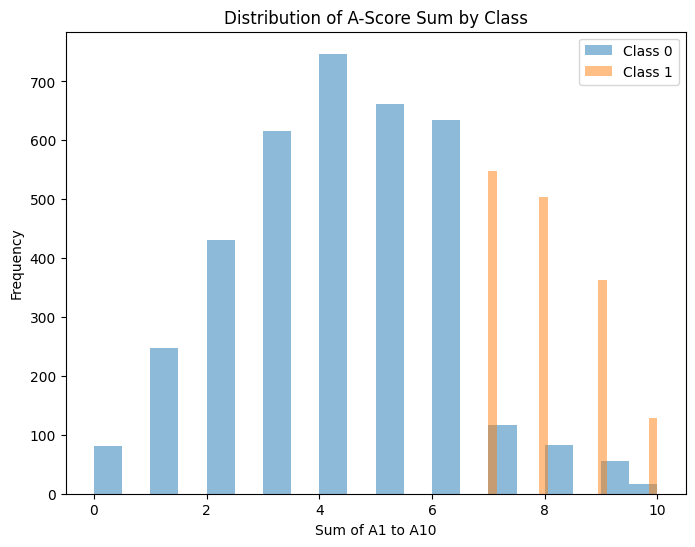


Feature engineering completed successfully.

Data types after feature engineering:
age               float64
age_squared       float64
age_family_asd     object
age_jauundice      object
sex_family_asd     object
dtype: object

Numerical features identified: ['age', 'age_squared', 'age_family_asd', 'age_jauundice']
Binary features identified: ['sex', 'jauundice', 'family_asd', 'sex_family_asd', 'a1', 'a2', 'a3', 'a4', 'a5', 'a6', 'a7', 'a8', 'a9', 'a10']
Categorical features for one-hot encoding: []

Training data shape: X_train=(3921, 19), y_train=(3921,)
Testing data shape: X_test=(1307, 19), y_test=(1307,)

Shape of processed training data: (3921, 18)
Shape of processed testing data: (1307, 18)

Processed data converted to DataFrame with feature names.

Processed training data (first 5 rows):


,age,age_squared,age_family_asd,age_jauundice,sex,jauundice,family_asd,sex_family_asd,a1,a2,a3,a4,a5,a6,a7,a8,a9,a10
0,3.24443,5.144965,-0.387808,-0.338512,0,0,0,0,0,1,1,1,1,1,1,0,1,0
1,-1.252784,-0.80697,-0.210085,-0.338512,1,0,1,1,1,1,0,1,1,0,1,0,0,0
2,-1.319907,-0.810724,-0.387808,-0.338512,0,0,0,0,1,1,0,1,0,1,1,0,1,1
3,-0.715803,-0.686855,-0.387808,0.736925,1,1,0,0,1,1,1,1,1,1,1,1,1,1
4,-0.782926,-0.710628,-0.387808,0.629381,0,1,0,0,1,1,1,1,1,1,1,1,1,1



Data types of processed training data:
age               object
age_squared       object
age_family_asd    object
age_jauundice     object
sex               object
jauundice         object
family_asd        object
sex_family_asd    object
a1                object
a2                object
a3                object
a4                object
a5                object
a6                object
a7                object
a8                object
a9                object
a10               object
dtype: object

Shape of X_train_processed_df after SMOTE: (5528, 18)

Data types after SMOTE:
age               object
age_squared       object
age_family_asd    object
age_jauundice     object
sex               object
jauundice         object
family_asd        object
sex_family_asd    object
a1                object
a2                object
a3                object
a4                object
a5                object
a6                object
a7                object
a8                object
a9              

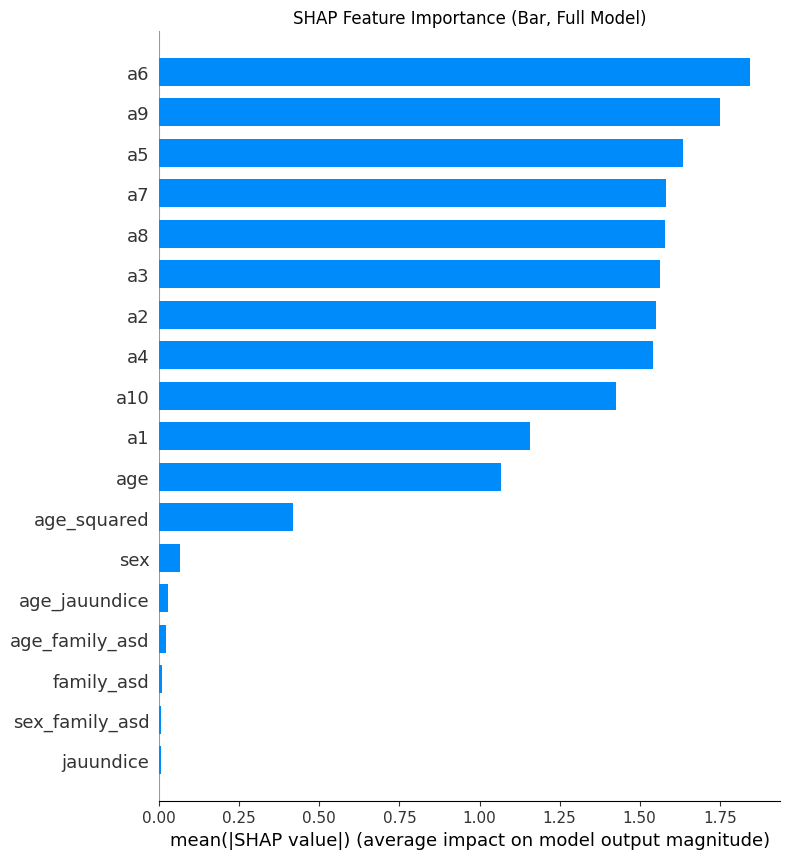

Generating SHAP summary plot (dot, Full Model)...


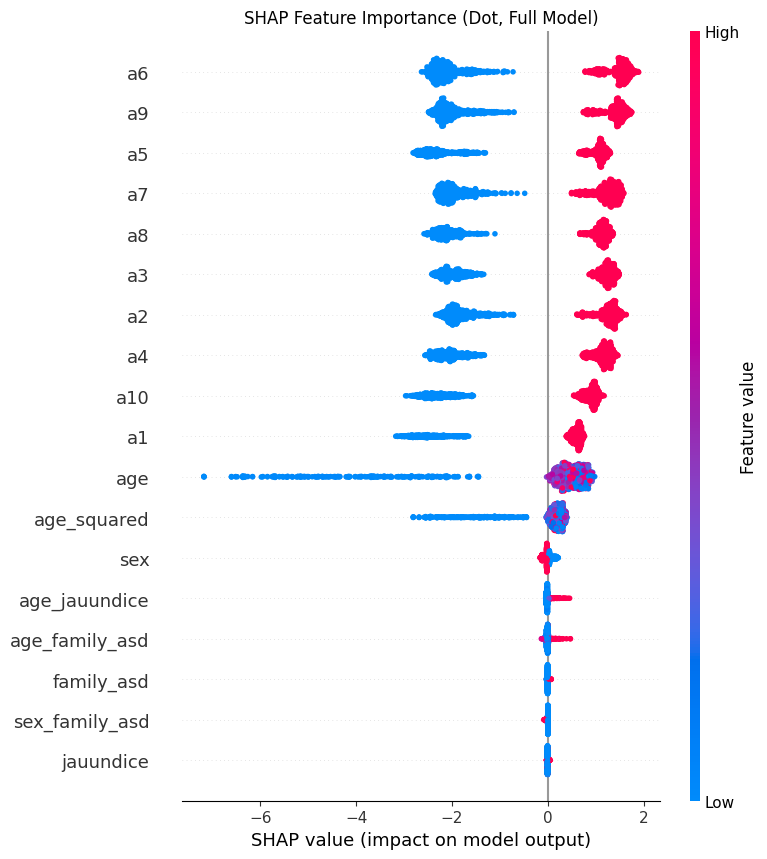


Generating SHAP waterfall plot for the first test instance (Full Model)...


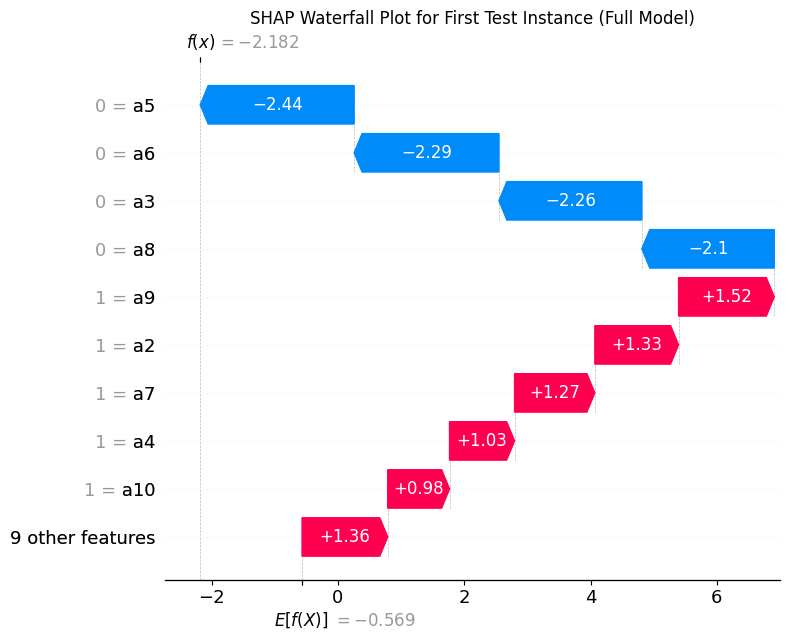


SHAP analysis complete (Full Model).

SHAP feature importance ranking:
           feature  importance
13              a6    1.845855
16              a9    1.751115
12              a5    1.634746
14              a7    1.581217
15              a8    1.578808
10              a3    1.564935
9               a2    1.550605
11              a4    1.542085
17             a10    1.426981
8               a1    1.156501
0              age    1.066605
1      age_squared    0.419136
4              sex    0.065453
3    age_jauundice    0.026375
2   age_family_asd    0.021313
6       family_asd    0.008651
7   sex_family_asd    0.006172
5        jauundice    0.004910

--- Training Model with Reduced Features (Excluding a1 to a10) ---

Shape of X_train_red_processed after SMOTE: (5528, 8)

Data types of reduced model training data:
age               float64
age_squared       float64
age_family_asd    float64
age_jauundice     float64
sex               float64
jauundice         float64
family_asd      

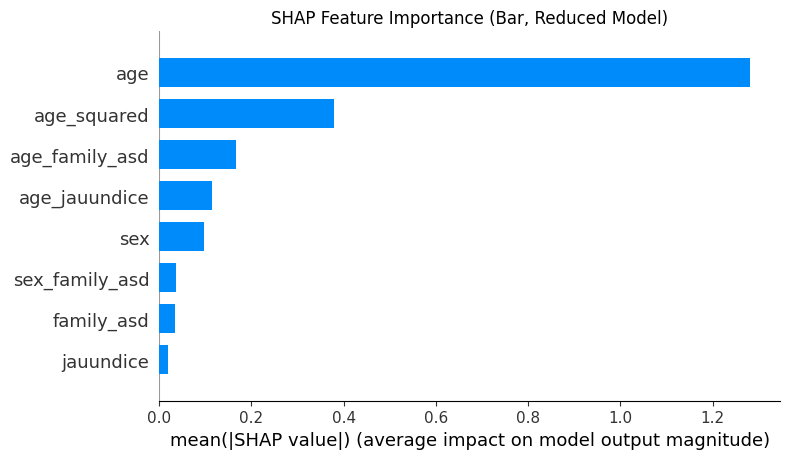

Generating SHAP summary plot (dot, Reduced Model)...


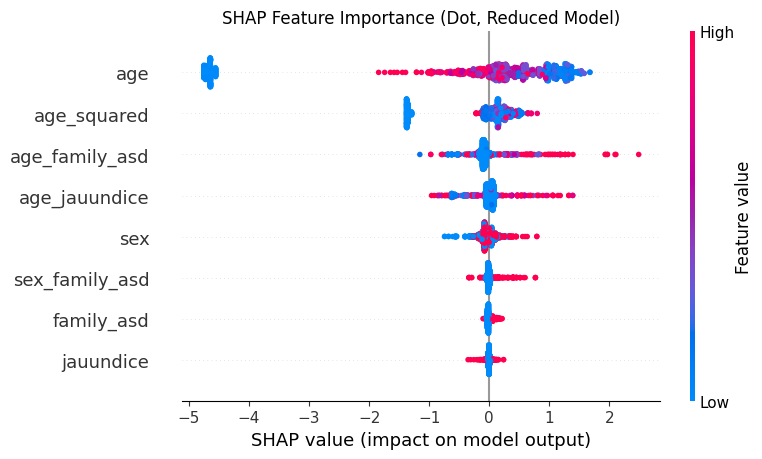


Generating SHAP waterfall plot for the first test instance (Reduced Model)...


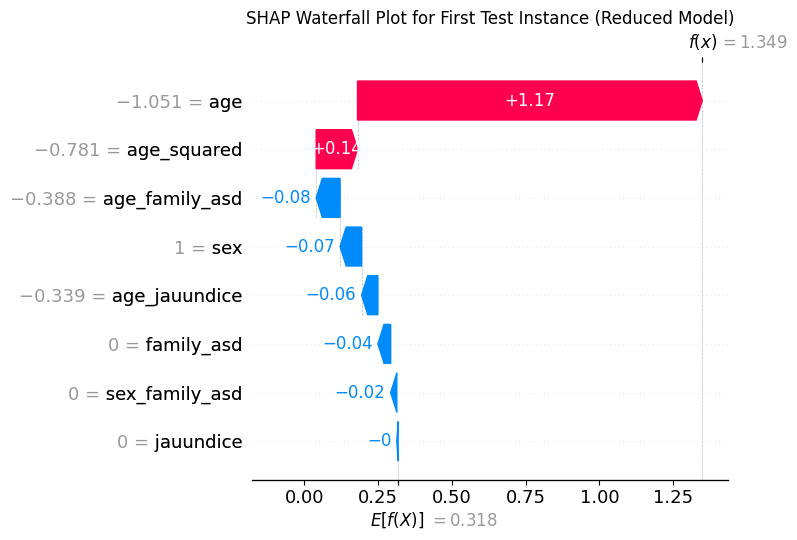


SHAP analysis complete (Reduced Model).

--- Training Random Forest Model (Reduced Features) ---

Best parameters for Random Forest model: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 108}

--- Random Forest Evaluation ---
Test Accuracy (Random Forest): 0.6419280795715379

Test ROC AUC Score (Random Forest): 0.683870467926867

Classification Report (Random Forest):
              precision    recall  f1-score   support

           0       0.80      0.66      0.72       922
           1       0.42      0.61      0.50       385

    accuracy                           0.64      1307
   macro avg       0.61      0.63      0.61      1307
weighted avg       0.69      0.64      0.66      1307


--- Training Voting Classifier (Reduced Features) ---

--- Voting Classifier Evaluation ---
Test Accuracy (Voting Classifier): 0.568477429227238

Test ROC AUC Score (Voting Classifier): 0.6902062146096853

Classification Report (Voting Classifier):
              pr

In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.feature_selection import RFE
import xgboost as xgb
import shap
import matplotlib.pyplot as plt
from IPython.display import display
from imblearn.over_sampling import SMOTE
from scipy.stats import uniform, randint

# --- 1. Load Data ---
try:
    df = pd.read_csv('Autism_Screening_Data_Combined.csv', na_values=['?'])
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print("Error: 'Autism_Screening_Data_Combined.csv' not found.")
    exit()

# --- 2. Remove Duplicates ---
print("\nChecking for duplicates in the dataset...")
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")
if duplicates > 0:
    df = df.drop_duplicates()
    print(f"Removed {duplicates} duplicate rows. New shape: {df.shape}")

# --- 3. Initial Data Inspection and Cleaning ---
print("\nDataset shape after deduplication:", df.shape)
original_columns = df.columns.tolist()
df.columns = [col.strip().lower().replace('/', '_').replace(' ', '_') for col in df.columns]
normalized_columns = df.columns.tolist()
print("\nOriginal columns:", original_columns)
print("Normalized columns:", normalized_columns)

if 'case_no' in df.columns:
    df = df.drop('case_no', axis=1)
    print("\nDropped 'case_no' column.")

print("\nFirst 5 rows of the dataset:")
display(df.head())
print("\nDataset info:")
df.info()

# --- 4. Define Target and Features ---
TARGET_COLUMN_CANDIDATES = ['class_asd', 'class']
TARGET_COLUMN = None
for tc in TARGET_COLUMN_CANDIDATES:
    if tc in df.columns:
        TARGET_COLUMN = tc
        print(f"\nTarget column identified as: '{TARGET_COLUMN}'")
        break

if TARGET_COLUMN is None:
    print(f"\nError: None of the candidate target columns {TARGET_COLUMN_CANDIDATES} found.")
    print(f"Available columns: {df.columns.tolist()}")
    exit()

if df[TARGET_COLUMN].dtype == 'object':
    df[TARGET_COLUMN] = df[TARGET_COLUMN].astype(str).str.upper().map({'YES': 1, 'NO': 0})
    print(f"\nTarget column '{TARGET_COLUMN}' converted to 0/1.")

if df[TARGET_COLUMN].isnull().any():
    print(f"Warning: NaNs in target column '{TARGET_COLUMN}'. Dropping these rows.")
    df.dropna(subset=[TARGET_COLUMN], inplace=True)
    df[TARGET_COLUMN] = df[TARGET_COLUMN].astype(int)

X = df.drop(TARGET_COLUMN, axis=1)
y = df[TARGET_COLUMN]

print(f"\nShape of features (X): {X.shape}")
print(f"Shape of target (y): {y.shape}")
print(f"\nValue counts for target variable '{TARGET_COLUMN}':")
print(y.value_counts(dropna=False))
print("\nColumns in X (features):")
print(X.columns.tolist())

# --- 5. Encode Binary Features ---
binary_categorical_features_map = {
    'sex': {'f': 0, 'm': 1},
    'jauundice': {'no': 0, 'yes': 1},
    'family_asd': {'no': 0, 'yes': 1}
}
for col, mapping in binary_categorical_features_map.items():
    if col in X.columns:
        if X[col].dtype == 'object':
            X.loc[:, col] = X[col].astype(str).str.lower().map(mapping)
            if X[col].isnull().any():
                print(f"Warning: NaNs in binary column '{col}'. Filling with most frequent.")
                X.loc[:, col] = X[col].fillna(X[col].mode()[0])
            X.loc[:, col] = X[col].astype(int)
        else:
            print(f"Column '{col}' is already numeric.")
    else:
        print(f"Warning: Binary categorical column '{col}' not found.")
print("\nData types after binary encoding:")
print(X[['sex', 'jauundice', 'family_asd']].dtypes)

# --- 6. Diagnostic: Check for Data Leakage ---
print("\nCorrelation of features with target:")
correlations = X.corrwith(y, numeric_only=True)
print(correlations)

if all(f'a{i}' in X.columns for i in range(1, 11)):
    X['a_score_sum'] = X[[f'a{i}' for i in range(1, 11)]].sum(axis=1)
    print("\nCorrelation of a_score_sum with target:")
    print(X['a_score_sum'].corr(y))

    plt.figure(figsize=(8, 6))
    for label in [0, 1]:
        plt.hist(X[y == label]['a_score_sum'], bins=20, alpha=0.5, label=f'Class {label}')
    plt.title('Distribution of A-Score Sum by Class')
    plt.xlabel('Sum of A1 to A10')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

# --- 7. Feature Engineering ---
try:
    X['age'] = X['age'].astype(float)
    X['age_family_asd'] = X['age'] * X['family_asd']
    X['age_jauundice'] = X['age'] * X['jauundice']
    X['sex_family_asd'] = X['sex'] * X['family_asd']
    X['age_squared'] = X['age'] ** 2
    print("\nFeature engineering completed successfully.")
    print("\nData types after feature engineering:")
    print(X[['age', 'age_squared', 'age_family_asd', 'age_jauundice', 'sex_family_asd']].dtypes)
except Exception as e:
    print(f"Error during feature engineering: {e}")
    print("Data types of columns involved:")
    print(X[['age', 'sex', 'jauundice', 'family_asd']].dtypes)
    exit()

# --- 8. Identify Feature Types ---
a_score_features = [f'a{i}' for i in range(1, 11) if f'a{i}' in X.columns]
numerical_features = ['age', 'age_squared', 'age_family_asd', 'age_jauundice']
binary_features = ['sex', 'jauundice', 'family_asd', 'sex_family_asd'] + a_score_features
categorical_features_onehot = []

print("\nNumerical features identified:", numerical_features)
print("Binary features identified:", binary_features)
print("Categorical features for one-hot encoding:", categorical_features_onehot)

# --- 9. Preprocessor Setup ---
transformers_list = []
if numerical_features:
    numerical_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
    ])
    transformers_list.append(('num', numerical_pipeline, numerical_features))
if binary_features:
    binary_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='most_frequent'))
    ])
    transformers_list.append(('bin', binary_pipeline, binary_features))
if categorical_features_onehot:
    categorical_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
    ])
    transformers_list.append(('cat', categorical_pipeline, categorical_features_onehot))

if not transformers_list:
    print("\nError: No valid transformers created. Exiting.")
    exit()

preprocessor = ColumnTransformer(transformers=transformers_list, remainder='drop')

# --- 10. Train-Test Split ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)
print(f"\nTraining data shape: X_train={X_train.shape}, y_train={y_train.shape}")
print(f"Testing data shape: X_test={X_test.shape}, y_test={y_test.shape}")

# --- 11. Apply Preprocessing ---
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

print("\nShape of processed training data:", X_train_processed.shape)
print("Shape of processed testing data:", X_test_processed.shape)

# --- 12. Create DataFrames with Feature Names ---
feature_names_out = numerical_features + binary_features
if len(feature_names_out) == X_train_processed.shape[1]:
    X_train_processed_df = pd.DataFrame(X_train_processed, columns=feature_names_out)
    X_test_processed_df = pd.DataFrame(X_test_processed, columns=feature_names_out)
    print("\nProcessed data converted to DataFrame with feature names.")
    print("\nProcessed training data (first 5 rows):")
    display(X_train_processed_df.head())
    print("\nData types of processed training data:")
    print(X_train_processed_df.dtypes)
else:
    print(f"Warning: Mismatch in feature names ({len(feature_names_out)}) and columns ({X_train_processed.shape[1]}).")
    X_train_processed_df = X_train_processed
    X_test_processed_df = X_test_processed

# --- 13. Apply SMOTE ---
smote = SMOTE(random_state=42)
X_train_processed_df, y_train = smote.fit_resample(X_train_processed_df, y_train)
print("\nShape of X_train_processed_df after SMOTE:", X_train_processed_df.shape)
print("\nData types after SMOTE:")
print(X_train_processed_df.dtypes)

# Ensure all columns are float for XGBoost
X_train_processed_df = X_train_processed_df.astype(float)
X_test_processed_df = X_test_processed_df.astype(float)
print("\nData types after forcing float conversion:")
print(X_train_processed_df.dtypes)

# --- 14. Train Full Model with RandomizedSearchCV ---
scale_pos_weight = (y == 0).sum() / (y == 1).sum()

print("\nTraining XGBoost model (Full Features)...")
model = xgb.XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    random_state=42,
    scale_pos_weight=scale_pos_weight
)
param_dist = {
    'n_estimators': randint(50, 300),
    'learning_rate': uniform(0.01, 0.2),
    'max_depth': randint(2, 6),
    'subsample': uniform(0.5, 0.5),
    'colsample_bytree': uniform(0.5, 0.5)
}
try:
    random_search = RandomizedSearchCV(model, param_dist, n_iter=50, cv=5, scoring='roc_auc', n_jobs=-1, random_state=42, error_score='raise')
    random_search.fit(X_train_processed_df, y_train)
    print("\nBest parameters for full model:", random_search.best_params_)
    model = random_search.best_estimator_
    model.fit(X_train_processed_df, y_train)
    print("XGBoost model trained (Full Features).")
except Exception as e:
    print(f"Error during RandomizedSearchCV: {e}")
    exit()

# --- 15. Cross-Validation (Full Model) ---
print("\nPerforming 5-fold cross-validation (Full Model)...")
cv_scores = cross_val_score(model, X_train_processed_df, y_train, cv=5, scoring='roc_auc')
print("Cross-validation ROC AUC scores:", cv_scores)
print("Mean CV ROC AUC:", cv_scores.mean())
print("Standard deviation:", cv_scores.std())

# --- 16. Evaluate Full Model ---
y_pred_train = model.predict(X_train_processed_df)
y_pred_test = model.predict(X_test_processed_df)
y_pred_proba_test = model.predict_proba(X_test_processed_df)[:, 1]

print("\n--- Full Model Evaluation ---")
print("Training Accuracy:", accuracy_score(y_train, y_pred_train))
print("Test Accuracy:", accuracy_score(y_test, y_pred_test))
print("\nTest ROC AUC Score:", roc_auc_score(y_test, y_pred_proba_test))
print("\nClassification Report (Test Set):")
print(classification_report(y_test, y_pred_test))

# --- 17. SHAP Analysis (Full Model) ---
if isinstance(X_test_processed_df, pd.DataFrame) and not X_test_processed_df.empty:
    try:
        explainer = shap.TreeExplainer(model, X_train_processed_df)
        shap_values = explainer.shap_values(X_test_processed_df)

        shap_values_for_plot = shap_values
        if isinstance(shap_values, list) and len(shap_values) == 2:
            shap_values_for_plot = shap_values[1]

        print("Generating SHAP summary plot (bar, Full Model)...")
        shap.summary_plot(shap_values_for_plot, X_test_processed_df, plot_type="bar", show=False)
        plt.title("SHAP Feature Importance (Bar, Full Model)")
        plt.tight_layout()
        plt.show()

        print("Generating SHAP summary plot (dot, Full Model)...")
        shap.summary_plot(shap_values_for_plot, X_test_processed_df, show=False)
        plt.title("SHAP Feature Importance (Dot, Full Model)")
        plt.tight_layout()
        plt.show()

        if len(X_test_processed_df) > 0:
            print("\nGenerating SHAP waterfall plot for the first test instance (Full Model)...")
            expected_value = explainer.expected_value
            if isinstance(expected_value, list) and len(expected_value) == 2:
                expected_value = expected_value[1]

            shap.waterfall_plot(shap.Explanation(
                values=shap_values_for_plot[0, :],
                base_values=expected_value,
                data=X_test_processed_df.iloc[0, :],
                feature_names=X_test_processed_df.columns.tolist()
            ), show=False)
            plt.title("SHAP Waterfall Plot for First Test Instance (Full Model)")
            plt.tight_layout()
            plt.show()
        print("\nSHAP analysis complete (Full Model).")

        # SHAP-guided feature selection
        shap_importance = np.abs(shap_values_for_plot).mean(axis=0)
        shap_df = pd.DataFrame({'feature': X_test_processed_df.columns, 'importance': shap_importance})
        shap_df = shap_df.sort_values(by='importance', ascending=False)
        print("\nSHAP feature importance ranking:")
        print(shap_df)

    except Exception as e:
        print(f"An error occurred during SHAP analysis (Full Model): {e}")

# --- 18. Train Reduced Model with Feature Engineering and SMOTE ---
print("\n--- Training Model with Reduced Features (Excluding a1 to a10) ---")
X_reduced = X[['age', 'sex', 'jauundice', 'family_asd', 'age_family_asd', 'age_jauundice', 'sex_family_asd', 'age_squared']].copy()

valid_numerical_features_red = ['age', 'age_squared', 'age_family_asd', 'age_jauundice']
valid_binary_features_red = ['sex', 'jauundice', 'family_asd', 'sex_family_asd']
transformers_list_red = [
    ('num', Pipeline([('imputer', SimpleImputer(strategy='median')), ('scaler', StandardScaler())]), valid_numerical_features_red),
    ('bin', Pipeline([('imputer', SimpleImputer(strategy='most_frequent'))]), valid_binary_features_red)
]
preprocessor_red = ColumnTransformer(transformers=transformers_list_red, remainder='drop')

X_train_red, X_test_red, y_train_red, y_test_red = train_test_split(
    X_reduced, y, test_size=0.25, random_state=42, stratify=y
)

X_train_red_processed = preprocessor_red.fit_transform(X_train_red)
X_test_red_processed = preprocessor_red.transform(X_test_red)

# Apply SMOTE
X_train_red_processed, y_train_red = smote.fit_resample(X_train_red_processed, y_train_red)
print("\nShape of X_train_red_processed after SMOTE:", X_train_red_processed.shape)

# Convert to DataFrame
feature_names_red = valid_numerical_features_red + valid_binary_features_red
X_train_red_processed_df = pd.DataFrame(X_train_red_processed, columns=feature_names_red)
X_test_red_processed_df = pd.DataFrame(X_test_red_processed, columns=feature_names_red)

# Ensure all columns are float
X_train_red_processed_df = X_train_red_processed_df.astype(float)
X_test_red_processed_df = X_test_red_processed_df.astype(float)
print("\nData types of reduced model training data:")
print(X_train_red_processed_df.dtypes)

# Hyperparameter tuning for reduced model
model_red = xgb.XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    random_state=42,
    scale_pos_weight=scale_pos_weight
)
random_search_red = RandomizedSearchCV(model_red, param_dist, n_iter=50, cv=5, scoring='roc_auc', n_jobs=-1, random_state=42)
random_search_red.fit(X_train_red_processed_df, y_train_red)
print("\nBest parameters for reduced model:", random_search_red.best_params_)

model_red = random_search_red.best_estimator_
model_red.fit(X_train_red_processed_df, y_train_red)

y_pred_red_test = model_red.predict(X_test_red_processed_df)
y_pred_red_proba_test = model_red.predict_proba(X_test_red_processed_df)[:, 1]

print("\n--- Reduced Model Evaluation ---")
print("Test Accuracy (Reduced Features):", accuracy_score(y_test_red, y_pred_red_test))
print("\nTest ROC AUC Score (Reduced Features):", roc_auc_score(y_test_red, y_pred_red_proba_test))
print("\nClassification Report (Reduced Features):")
print(classification_report(y_test_red, y_pred_red_test))

# --- 19. SHAP Analysis (Reduced Model) ---
if isinstance(X_test_red_processed_df, pd.DataFrame) and not X_test_red_processed_df.empty:
    try:
        explainer_red = shap.TreeExplainer(model_red, X_train_red_processed_df)
        shap_values_red = explainer_red.shap_values(X_test_red_processed_df)

        shap_values_red_for_plot = shap_values_red
        if isinstance(shap_values_red, list) and len(shap_values_red) == 2:
            shap_values_red_for_plot = shap_values_red[1]

        print("Generating SHAP summary plot (bar, Reduced Model)...")
        shap.summary_plot(shap_values_red_for_plot, X_test_red_processed_df, plot_type="bar", show=False)
        plt.title("SHAP Feature Importance (Bar, Reduced Model)")
        plt.tight_layout()
        plt.show()

        print("Generating SHAP summary plot (dot, Reduced Model)...")
        shap.summary_plot(shap_values_red_for_plot, X_test_red_processed_df, show=False)
        plt.title("SHAP Feature Importance (Dot, Reduced Model)")
        plt.tight_layout()
        plt.show()

        if len(X_test_red_processed_df) > 0:
            print("\nGenerating SHAP waterfall plot for the first test instance (Reduced Model)...")
            expected_value_red = explainer_red.expected_value
            if isinstance(expected_value_red, list) and len(expected_value_red) == 2:
                expected_value_red = expected_value_red[1]

            shap.waterfall_plot(shap.Explanation(
                values=shap_values_red_for_plot[0, :],
                base_values=expected_value_red,
                data=X_test_red_processed_df.iloc[0, :],
                feature_names=X_test_red_processed_df.columns.tolist()
            ), show=False)
            plt.title("SHAP Waterfall Plot for First Test Instance (Reduced Model)")
            plt.tight_layout()
            plt.show()
        print("\nSHAP analysis complete (Reduced Model).")

    except Exception as e:
        print(f"An error occurred during SHAP analysis (Reduced Model): {e}")

# --- 20. Random Forest Model (Reduced Features) ---
print("\n--- Training Random Forest Model (Reduced Features) ---")
rf_model = RandomForestClassifier(random_state=42, class_weight='balanced')
rf_param_dist = {
    'n_estimators': randint(50, 300),
    'max_depth': [None] + list(range(3, 10)),
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 5)
}
random_search_rf = RandomizedSearchCV(rf_model, rf_param_dist, n_iter=50, cv=5, scoring='roc_auc', n_jobs=-1, random_state=42)
random_search_rf.fit(X_train_red_processed_df, y_train_red)
print("\nBest parameters for Random Forest model:", random_search_rf.best_params_)

rf_model = random_search_rf.best_estimator_
rf_model.fit(X_train_red_processed_df, y_train_red)

y_pred_rf_test = rf_model.predict(X_test_red_processed_df)
y_pred_rf_proba_test = rf_model.predict_proba(X_test_red_processed_df)[:, 1]

print("\n--- Random Forest Evaluation ---")
print("Test Accuracy (Random Forest):", accuracy_score(y_test_red, y_pred_rf_test))
print("\nTest ROC AUC Score (Random Forest):", roc_auc_score(y_test_red, y_pred_rf_proba_test))
print("\nClassification Report (Random Forest):")
print(classification_report(y_test_red, y_pred_rf_test))

# --- 21. Voting Classifier (Reduced Features) ---
print("\n--- Training Voting Classifier (Reduced Features) ---")
voting_model = VotingClassifier(
    estimators=[
        ('xgb', model_red),
        ('rf', rf_model)
    ],
    voting='soft'
)
voting_model.fit(X_train_red_processed_df, y_train_red)

y_pred_voting_test = voting_model.predict(X_test_red_processed_df)
y_pred_voting_proba_test = voting_model.predict_proba(X_test_red_processed_df)[:, 1]

print("\n--- Voting Classifier Evaluation ---")
print("Test Accuracy (Voting Classifier):", accuracy_score(y_test_red, y_pred_voting_test))
print("\nTest ROC AUC Score (Voting Classifier):", roc_auc_score(y_test_red, y_pred_voting_proba_test))
print("\nClassification Report (Voting Classifier):")
print(classification_report(y_test_red, y_pred_voting_test))

# --- 22. Script Finished ---
print("\n--- Script Finished ---")

Dataset loaded successfully.

Checking for duplicates in the dataset...
Number of duplicate rows: 847
Removed 847 duplicate rows. New shape: (5228, 15)

Dataset shape after deduplication: (5228, 15)

Original columns: ['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'Age', 'Sex', 'Jauundice', 'Family_ASD', 'Class']
Normalized columns: ['a1', 'a2', 'a3', 'a4', 'a5', 'a6', 'a7', 'a8', 'a9', 'a10', 'age', 'sex', 'jauundice', 'family_asd', 'class']

First 5 rows of the dataset:


,a1,a2,a3,a4,a5,a6,a7,a8,a9,a10,age,sex,jauundice,family_asd,class
0,1,1,0,1,0,0,1,1,0,0,15,m,no,no,NO
1,0,1,1,1,0,1,1,0,1,0,15,m,no,no,NO
2,1,1,1,0,1,1,1,1,1,1,15,f,no,yes,YES
3,1,1,1,1,1,1,1,1,0,0,16,f,no,no,YES
4,1,1,1,1,1,1,1,1,1,1,15,f,no,no,YES



Dataset info:
<class 'pandas.core.frame.DataFrame'>
Index: 5228 entries, 0 to 6074
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   a1          5228 non-null   int64 
 1   a2          5228 non-null   int64 
 2   a3          5228 non-null   int64 
 3   a4          5228 non-null   int64 
 4   a5          5228 non-null   int64 
 5   a6          5228 non-null   int64 
 6   a7          5228 non-null   int64 
 7   a8          5228 non-null   int64 
 8   a9          5228 non-null   int64 
 9   a10         5228 non-null   int64 
 10  age         5228 non-null   int64 
 11  sex         5228 non-null   object
 12  jauundice   5228 non-null   object
 13  family_asd  5228 non-null   object
 14  class       5228 non-null   object
dtypes: int64(11), object(4)
memory usage: 653.5+ KB

Target column 'class' converted to 0/1.

Shape of features (X): (5228, 14)
Shape of target (y): (5228,)

Value counts for target variable 'class':
cl

<ipython-input-9-56f6d14171ff>:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[TARGET_COLUMN] = df[TARGET_COLUMN].astype(str).str.upper().map({'YES': 1, 'NO': 0})


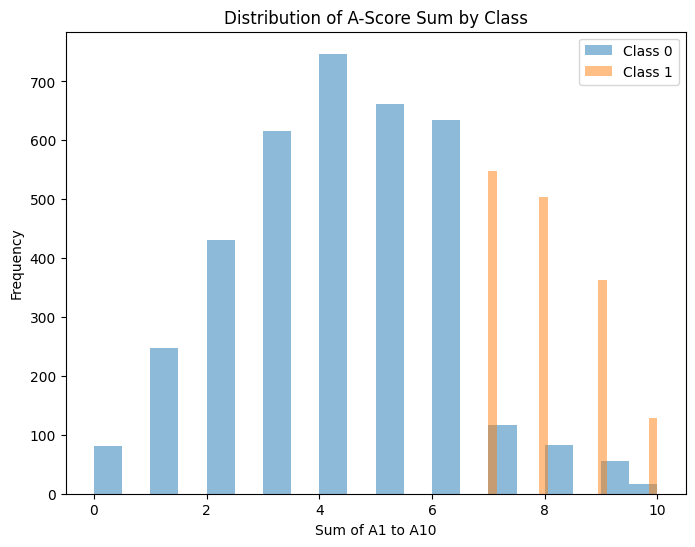


Feature engineering completed successfully.

Data types after feature engineering:
age               float64
age_squared       float64
age_cubed         float64
age_family_asd     object
age_jauundice      object
sex_family_asd     object
sex_jauundice      object
age_binned          int64
dtype: object

Numerical features identified: ['age', 'age_squared', 'age_cubed', 'age_family_asd', 'age_jauundice']
Binary features identified: ['sex', 'jauundice', 'family_asd', 'sex_family_asd', 'sex_jauundice', 'age_binned', 'a1', 'a2', 'a3', 'a4', 'a5', 'a6', 'a7', 'a8', 'a9', 'a10']
Categorical features for one-hot encoding: []

Training data shape: X_train=(3921, 22), y_train=(3921,)
Testing data shape: X_test=(1307, 22), y_test=(1307,)

Shape of processed training data: (3921, 21)
Shape of processed testing data: (1307, 21)

Processed data converted to DataFrame with feature names.

Processed training data (first 5 rows):


,age,age_squared,age_cubed,age_family_asd,age_jauundice,sex,jauundice,family_asd,sex_family_asd,sex_jauundice,...,a1,a2,a3,a4,a5,a6,a7,a8,a9,a10
0,3.24443,5.144965,6.879639,-0.387808,-0.338512,0,0,0,0,0,...,0,1,1,1,1,1,1,0,1,0
1,-1.252784,-0.80697,-0.557984,-0.210085,-0.338512,1,0,1,1,0,...,1,1,0,1,1,0,1,0,0,0
2,-1.319907,-0.810724,-0.558143,-0.387808,-0.338512,0,0,0,0,0,...,1,1,0,1,0,1,1,0,1,1
3,-0.715803,-0.686855,-0.535524,-0.387808,0.736925,1,1,0,0,1,...,1,1,1,1,1,1,1,1,1,1
4,-0.782926,-0.710628,-0.54166,-0.387808,0.629381,0,1,0,0,0,...,1,1,1,1,1,1,1,1,1,1



Data types of processed training data:
age               object
age_squared       object
age_cubed         object
age_family_asd    object
age_jauundice     object
sex               object
jauundice         object
family_asd        object
sex_family_asd    object
sex_jauundice     object
age_binned        object
a1                object
a2                object
a3                object
a4                object
a5                object
a6                object
a7                object
a8                object
a9                object
a10               object
dtype: object

Shape of X_train_processed_df after sampling: (4422, 21)

Data types after sampling:
age               object
age_squared       object
age_cubed         object
age_family_asd    object
age_jauundice     object
sex               object
jauundice         object
family_asd        object
sex_family_asd    object
sex_jauundice     object
age_binned        object
a1                object
a2                object
a3        

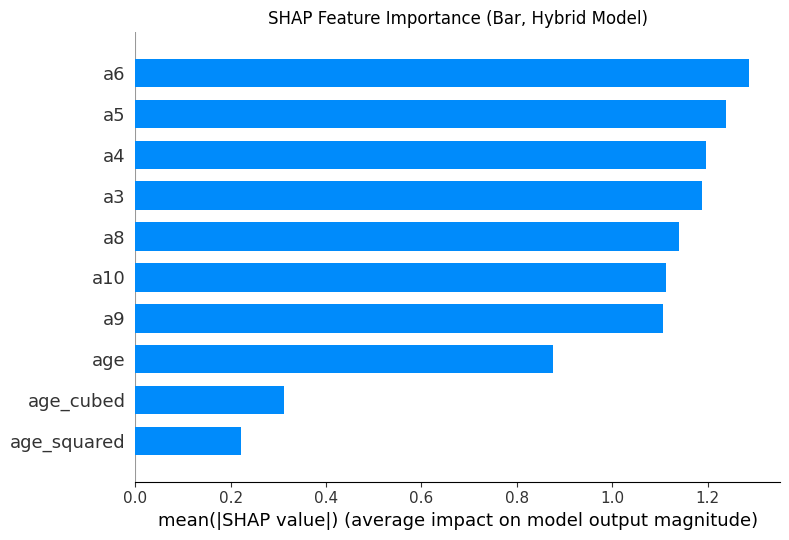

Generating SHAP summary plot (dot, Hybrid Model)...


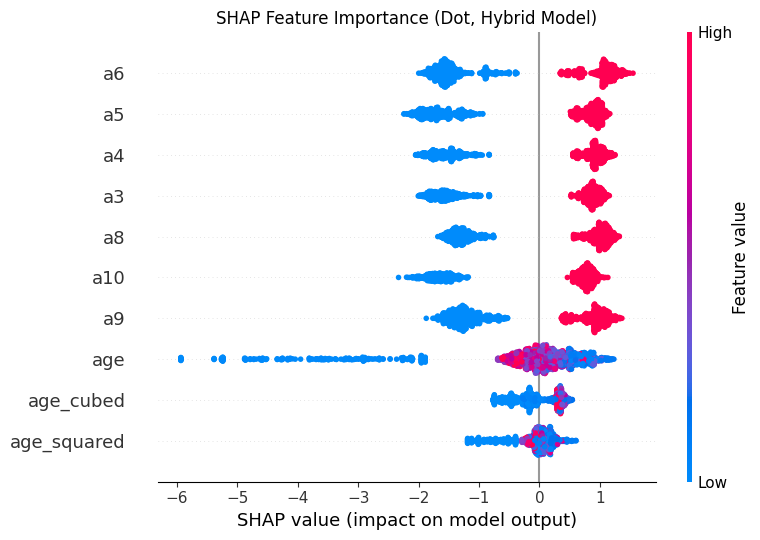


Generating SHAP waterfall plot for the first test instance (Hybrid Model)...


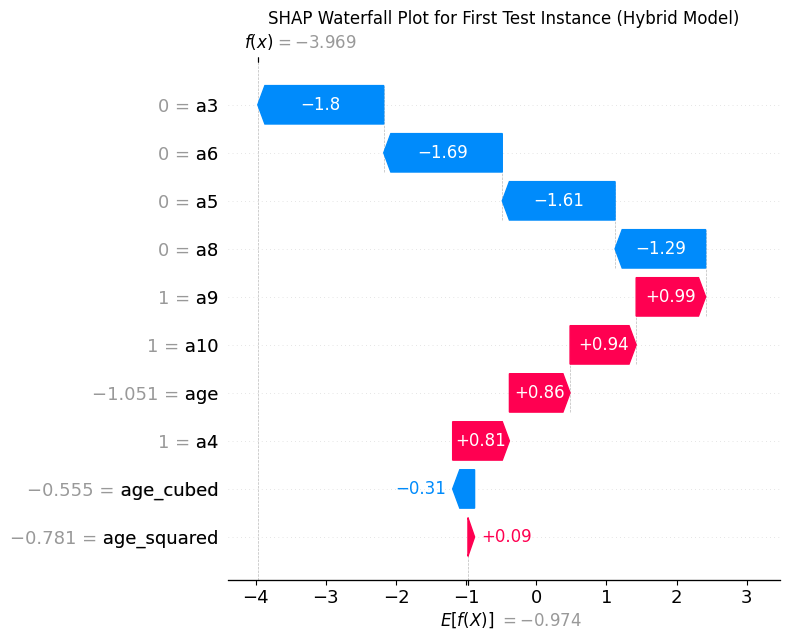


SHAP analysis complete (Hybrid Model).

SHAP feature importance ranking:
       feature  importance
6           a6    1.287338
5           a5    1.239261
4           a4    1.196468
3           a3    1.188697
7           a8    1.140535
9          a10    1.112200
8           a9    1.105568
0          age    0.875345
2    age_cubed    0.310825
1  age_squared    0.221973

--- Script Finished ---


In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.feature_selection import SelectKBest, mutual_info_classif
import xgboost as xgb
import lightgbm as lgb
import shap
import matplotlib.pyplot as plt
from IPython.display import display
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as ImbPipeline
from scipy.stats import uniform, randint

# --- 1. Load Data ---
try:
    df = pd.read_csv('Autism_Screening_Data_Combined.csv', na_values=['?'])
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print("Error: 'Autism_Screening_Data_Combined.csv' not found.")
    exit()

# --- 2. Remove Duplicates ---
print("\nChecking for duplicates in the dataset...")
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")
if duplicates > 0:
    df = df.drop_duplicates()
    print(f"Removed {duplicates} duplicate rows. New shape: {df.shape}")

# --- 3. Initial Data Inspection and Cleaning ---
print("\nDataset shape after deduplication:", df.shape)
original_columns = df.columns.tolist()
df.columns = [col.strip().lower().replace('/', '_').replace(' ', '_') for col in df.columns]
normalized_columns = df.columns.tolist()
print("\nOriginal columns:", original_columns)
print("Normalized columns:", normalized_columns)

if 'case_no' in df.columns:
    df = df.drop('case_no', axis=1)
    print("\nDropped 'case_no' column.")

print("\nFirst 5 rows of the dataset:")
display(df.head())
print("\nDataset info:")
df.info()

# --- 4. Define Target and Features ---
TARGET_COLUMN = 'class'
if TARGET_COLUMN not in df.columns:
    print(f"\nError: Target column '{TARGET_COLUMN}' not found.")
    print(f"Available columns: {df.columns.tolist()}")
    exit()

if df[TARGET_COLUMN].dtype == 'object':
    df[TARGET_COLUMN] = df[TARGET_COLUMN].astype(str).str.upper().map({'YES': 1, 'NO': 0})
    print(f"\nTarget column '{TARGET_COLUMN}' converted to 0/1.")

if df[TARGET_COLUMN].isnull().any():
    print(f"Warning: NaNs in target column '{TARGET_COLUMN}'. Dropping these rows.")
    df.dropna(subset=[TARGET_COLUMN], inplace=True)
    df[TARGET_COLUMN] = df[TARGET_COLUMN].astype(int)

X = df.drop(TARGET_COLUMN, axis=1)
y = df[TARGET_COLUMN]

print(f"\nShape of features (X): {X.shape}")
print(f"Shape of target (y): {y.shape}")
print(f"\nValue counts for target variable '{TARGET_COLUMN}':")
print(y.value_counts(dropna=False))
print("\nColumns in X (features):")
print(X.columns.tolist())

# --- 5. Encode Binary Features ---
binary_categorical_features_map = {
    'sex': {'f': 0, 'm': 1},
    'jauundice': {'no': 0, 'yes': 1},
    'family_asd': {'no': 0, 'yes': 1}
}
for col, mapping in binary_categorical_features_map.items():
    if col in X.columns:
        if X[col].dtype == 'object':
            X.loc[:, col] = X[col].astype(str).str.lower().map(mapping)
            if X[col].isnull().any():
                print(f"Warning: NaNs in binary column '{col}'. Filling with most frequent.")
                X.loc[:, col] = X[col].fillna(X[col].mode()[0])
            X.loc[:, col] = X[col].astype(int)
        else:
            print(f"Column '{col}' is already numeric.")
    else:
        print(f"Warning: Binary categorical column '{col}' not found.")
print("\nData types after binary encoding:")
print(X[['sex', 'jauundice', 'family_asd']].dtypes)

# --- 6. Diagnostic: Check for Data Leakage ---
print("\nCorrelation of features with target:")
correlations = X.corrwith(y, numeric_only=True)
print(correlations)

if all(f'a{i}' in X.columns for i in range(1, 11)):
    X['a_score_sum'] = X[[f'a{i}' for i in range(1, 11)]].sum(axis=1)
    print("\nCorrelation of a_score_sum with target:")
    print(X['a_score_sum'].corr(y))

    plt.figure(figsize=(8, 6))
    for label in [0, 1]:
        plt.hist(X[y == label]['a_score_sum'], bins=20, alpha=0.5, label=f'Class {label}')
    plt.title('Distribution of A-Score Sum by Class')
    plt.xlabel('Sum of A1 to A10')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

# --- 7. Feature Engineering ---
try:
    X['age'] = X['age'].astype(float)
    X['age_family_asd'] = X['age'] * X['family_asd']
    X['age_jauundice'] = X['age'] * X['jauundice']
    X['sex_family_asd'] = X['sex'] * X['family_asd']
    X['age_squared'] = X['age'] ** 2
    X['age_cubed'] = X['age'] ** 3
    X['sex_jauundice'] = X['sex'] * X['jauundice']
    # Bin age
    X['age_binned'] = pd.cut(X['age'], bins=[0, 12, 18, 100], labels=[0, 1, 2]).astype(int)
    print("\nFeature engineering completed successfully.")
    print("\nData types after feature engineering:")
    print(X[['age', 'age_squared', 'age_cubed', 'age_family_asd', 'age_jauundice', 'sex_family_asd', 'sex_jauundice', 'age_binned']].dtypes)
except Exception as e:
    print(f"Error during feature engineering: {e}")
    print("Data types of columns involved:")
    print(X[['age', 'sex', 'jauundice', 'family_asd']].dtypes)
    exit()

# --- 8. Identify Feature Types ---
a_score_features = [f'a{i}' for i in range(1, 11) if f'a{i}' in X.columns]
numerical_features = ['age', 'age_squared', 'age_cubed', 'age_family_asd', 'age_jauundice']
binary_features = ['sex', 'jauundice', 'family_asd', 'sex_family_asd', 'sex_jauundice', 'age_binned'] + a_score_features
categorical_features_onehot = []

print("\nNumerical features identified:", numerical_features)
print("Binary features identified:", binary_features)
print("Categorical features for one-hot encoding:", categorical_features_onehot)

# --- 9. Preprocessor Setup ---
transformers_list = []
if numerical_features:
    numerical_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
    ])
    transformers_list.append(('num', numerical_pipeline, numerical_features))
if binary_features:
    binary_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='most_frequent'))
    ])
    transformers_list.append(('bin', binary_pipeline, binary_features))
if categorical_features_onehot:
    categorical_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
    ])
    transformers_list.append(('cat', categorical_pipeline, categorical_features_onehot))

if not transformers_list:
    print("\nError: No valid transformers created. Exiting.")
    exit()

preprocessor = ColumnTransformer(transformers=transformers_list, remainder='drop')

# --- 10. Train-Test Split ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)
print(f"\nTraining data shape: X_train={X_train.shape}, y_train={y_train.shape}")
print(f"Testing data shape: X_test={X_test.shape}, y_test={y_test.shape}")

# --- 11. Apply Preprocessing ---
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

print("\nShape of processed training data:", X_train_processed.shape)
print("Shape of processed testing data:", X_test_processed.shape)

# --- 12. Create DataFrames with Feature Names ---
feature_names_out = numerical_features + binary_features
if len(feature_names_out) == X_train_processed.shape[1]:
    X_train_processed_df = pd.DataFrame(X_train_processed, columns=feature_names_out)
    X_test_processed_df = pd.DataFrame(X_test_processed, columns=feature_names_out)
    print("\nProcessed data converted to DataFrame with feature names.")
    print("\nProcessed training data (first 5 rows):")
    display(X_train_processed_df.head())
    print("\nData types of processed training data:")
    print(X_train_processed_df.dtypes)
else:
    print(f"Warning: Mismatch in feature names ({len(feature_names_out)}) and columns ({X_train_processed.shape[1]}).")
    X_train_processed_df = X_train_processed
    X_test_processed_df = X_test_processed

# --- 13. Apply SMOTE and Undersampling ---
sampling_pipeline = ImbPipeline([
    ('smote', SMOTE(sampling_strategy=0.8, random_state=42)),
    ('undersample', RandomUnderSampler(sampling_strategy=1.0, random_state=42))
])
X_train_processed_df, y_train = sampling_pipeline.fit_resample(X_train_processed_df, y_train)
print("\nShape of X_train_processed_df after sampling:", X_train_processed_df.shape)
print("\nData types after sampling:")
print(X_train_processed_df.dtypes)

# Ensure all columns are float
X_train_processed_df = X_train_processed_df.astype(float)
X_test_processed_df = X_test_processed_df.astype(float)
print("\nData types after forcing float conversion:")
print(X_train_processed_df.dtypes)

# --- 14. Train Hybrid Model with Selected Features ---
print("\n--- Training Hybrid Model (Selected Features) ---")
# Select top features using mutual information
selector = SelectKBest(score_func=mutual_info_classif, k=10)
selector.fit(X_train_processed_df, y_train)
selected_features = X_train_processed_df.columns[selector.get_support()].tolist()
print("\nSelected features:", selected_features)

X_train_hybrid = X_train_processed_df[selected_features]
X_test_hybrid = X_test_processed_df[selected_features]

# Define models
xgb_model = xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss', random_state=42)
rf_model = RandomForestClassifier(random_state=42, class_weight='balanced')
lgb_model = lgb.LGBMClassifier(random_state=42, class_weight='balanced')

# Hyperparameter grids
xgb_param_dist = {
    'n_estimators': randint(50, 300),
    'learning_rate': uniform(0.01, 0.2),
    'max_depth': randint(2, 6),
    'subsample': uniform(0.5, 0.5),
    'colsample_bytree': uniform(0.5, 0.5)
}
rf_param_dist = {
    'n_estimators': randint(50, 300),
    'max_depth': [None] + list(range(3, 10)),
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 5)
}
lgb_param_dist = {
    'n_estimators': randint(50, 300),
    'learning_rate': uniform(0.01, 0.2),
    'max_depth': randint(2, 6),
    'subsample': uniform(0.5, 0.5),
    'colsample_bytree': uniform(0.5, 0.5)
}

# Tune XGBoost
random_search_xgb = RandomizedSearchCV(xgb_model, xgb_param_dist, n_iter=100, cv=10, scoring='roc_auc', n_jobs=-1, random_state=42)
random_search_xgb.fit(X_train_hybrid, y_train)
print("\nBest parameters for XGBoost:", random_search_xgb.best_params_)
xgb_model = random_search_xgb.best_estimator_

# Tune Random Forest
random_search_rf = RandomizedSearchCV(rf_model, rf_param_dist, n_iter=100, cv=10, scoring='roc_auc', n_jobs=-1, random_state=42)
random_search_rf.fit(X_train_hybrid, y_train)
print("\nBest parameters for Random Forest:", random_search_rf.best_params_)
rf_model = random_search_rf.best_estimator_

# Tune LightGBM
random_search_lgb = RandomizedSearchCV(lgb_model, lgb_param_dist, n_iter=100, cv=10, scoring='roc_auc', n_jobs=-1, random_state=42)
random_search_lgb.fit(X_train_hybrid, y_train)
print("\nBest parameters for LightGBM:", random_search_lgb.best_params_)
lgb_model = random_search_lgb.best_estimator_

# Stacking Classifier
stacking_model = StackingClassifier(
    estimators=[
        ('xgb', xgb_model),
        ('rf', rf_model),
        ('lgb', lgb_model)
    ],
    final_estimator=RandomForestClassifier(n_estimators=100, random_state=42),
    cv=5
)
stacking_model.fit(X_train_hybrid, y_train)

y_pred_hybrid = stacking_model.predict(X_test_hybrid)
y_pred_proba_hybrid = stacking_model.predict_proba(X_test_hybrid)[:, 1]

print("\n--- Hybrid Model Evaluation ---")
print("Test Accuracy (Hybrid):", accuracy_score(y_test, y_pred_hybrid))
print("\nTest ROC AUC Score (Hybrid):", roc_auc_score(y_test, y_pred_proba_hybrid))
print("\nClassification Report (Hybrid):")
print(classification_report(y_test, y_pred_hybrid))

# --- 15. SHAP Analysis (Hybrid Model) ---
if isinstance(X_test_hybrid, pd.DataFrame) and not X_test_hybrid.empty:
    try:
        explainer = shap.TreeExplainer(xgb_model, X_train_hybrid)  # Use XGBoost for SHAP
        shap_values = explainer.shap_values(X_test_hybrid)

        shap_values_for_plot = shap_values
        if isinstance(shap_values, list) and len(shap_values) == 2:
            shap_values_for_plot = shap_values[1]

        print("Generating SHAP summary plot (bar, Hybrid Model)...")
        shap.summary_plot(shap_values_for_plot, X_test_hybrid, plot_type="bar", show=False)
        plt.title("SHAP Feature Importance (Bar, Hybrid Model)")
        plt.tight_layout()
        plt.show()

        print("Generating SHAP summary plot (dot, Hybrid Model)...")
        shap.summary_plot(shap_values_for_plot, X_test_hybrid, show=False)
        plt.title("SHAP Feature Importance (Dot, Hybrid Model)")
        plt.tight_layout()
        plt.show()

        if len(X_test_hybrid) > 0:
            print("\nGenerating SHAP waterfall plot for the first test instance (Hybrid Model)...")
            expected_value = explainer.expected_value
            if isinstance(expected_value, list) and len(expected_value) == 2:
                expected_value = expected_value[1]

            shap.waterfall_plot(shap.Explanation(
                values=shap_values_for_plot[0, :],
                base_values=expected_value,
                data=X_test_hybrid.iloc[0, :],
                feature_names=X_test_hybrid.columns.tolist()
            ), show=False)
            plt.title("SHAP Waterfall Plot for First Test Instance (Hybrid Model)")
            plt.tight_layout()
            plt.show()
        print("\nSHAP analysis complete (Hybrid Model).")

        # SHAP-guided feature importance
        shap_importance = np.abs(shap_values_for_plot).mean(axis=0)
        shap_df = pd.DataFrame({'feature': X_test_hybrid.columns, 'importance': shap_importance})
        shap_df = shap_df.sort_values(by='importance', ascending=False)
        print("\nSHAP feature importance ranking:")
        print(shap_df)

    except Exception as e:
        print(f"An error occurred during SHAP analysis (Hybrid Model): {e}")

# --- 16. Script Finished ---
print("\n--- Script Finished ---")